In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import matplotlib
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd
import itertools
import seaborn as sns

In [2]:
print('np:', np.__version__)
print('pd:', pd.__version__)
print('nx:', nx.__version__)
print('matplotlib:', matplotlib.__version__)
print('seaborn:', sns.__version__)
print('powerlaw:', powerlaw.__version__)

np: 1.26.4
pd: 2.1.4
nx: 3.1
matplotlib: 3.8.0
seaborn: 0.12.2
powerlaw: 1.5


In [3]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [5]:
def graph(file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()

    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [6]:
def subject_graph(itr, seed, k, file_name):
    '''
    개별 교과(목)의 성취기준을 묶어서 네트워크를 만들고, 노드와 에지에 대한 정보를 시각적으로 표시.
    단, 함수 fruchterman_reingold_layout를 활용하여, 그림이 무작위하게 나오지 않게 방지.
    itr, seed, k 변수는 해당 함수의 파라미터를 의미하고 다음과 같다:
    - itr = Number of iterations of spring-force relaxation
    - seed = Seed number
    - k = Optimal distance between nodes.
    '''
    G = nx.Graph()

    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                continue
            else:
                G.add_node(i)
        # 에지 ij와 그의 weight 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 i의 노드 강도 추가
    f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = plt.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, k=k, iterations=itr, weight='weight', seed=seed)  # 그래프의 노드 위치 결정
    fig, ax = plt.subplots(figsize=(6,4), dpi=300)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Node strength') ##'ax=ax' 지정
    
    plt.show()

In [7]:
def entire_Graph():
    '''
    모든 교과(목)의 성취기준을 묶어서 네트워크를 만듦.
    '''
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    continue
                else:
                    G.add_node(i)        
            # 에지 ij와 그의 weight 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 i의 노드 강도 추가
        f = open(f"All_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [8]:
def basic_info(G):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 값
    (여기서 node weight는 node strenght를 의미)
    '''
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    
    return hist_edges, hist_edgeWeight, hist_nodeWeight

In [9]:
def hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    Edge degree dist, Node strength dist, Edge weight dist 그림
    (여기서 node weight는 node strenght를 의미)
    '''
    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [10]:
def power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight):
    '''
    분포가 멱급수 분포를 따르는지 확인.
    '''
    # Dist. of degree
    fit = powerlaw.Fit(hist_edges)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of edge weight
    fit = powerlaw.Fit(hist_edgeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of degree: Pass, {fit.power_law.alpha}\n")

    # Dist. of node strength
    fit = powerlaw.Fit(hist_nodeWeight)
    R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
    if p >= 0.05:
        print(f"Dist. of node strength: Pass, {fit.power_law.alpha}\n")

In [11]:
def info(G):
    '''
    Node degree, Node strength, Edge weight, BC 값이 큰 노드 또는 에지 나열.
    '''
    node_degree = dict(G.degree())

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # betweenness centrality 계산
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')

    # 결과 출력
    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df2,df3,df4,df5],axis=1)
    
    return df

# 1. 전체 언어 네트워크 

## 전체 언어 네트워크 기본 통계

In [12]:
G = entire_Graph()

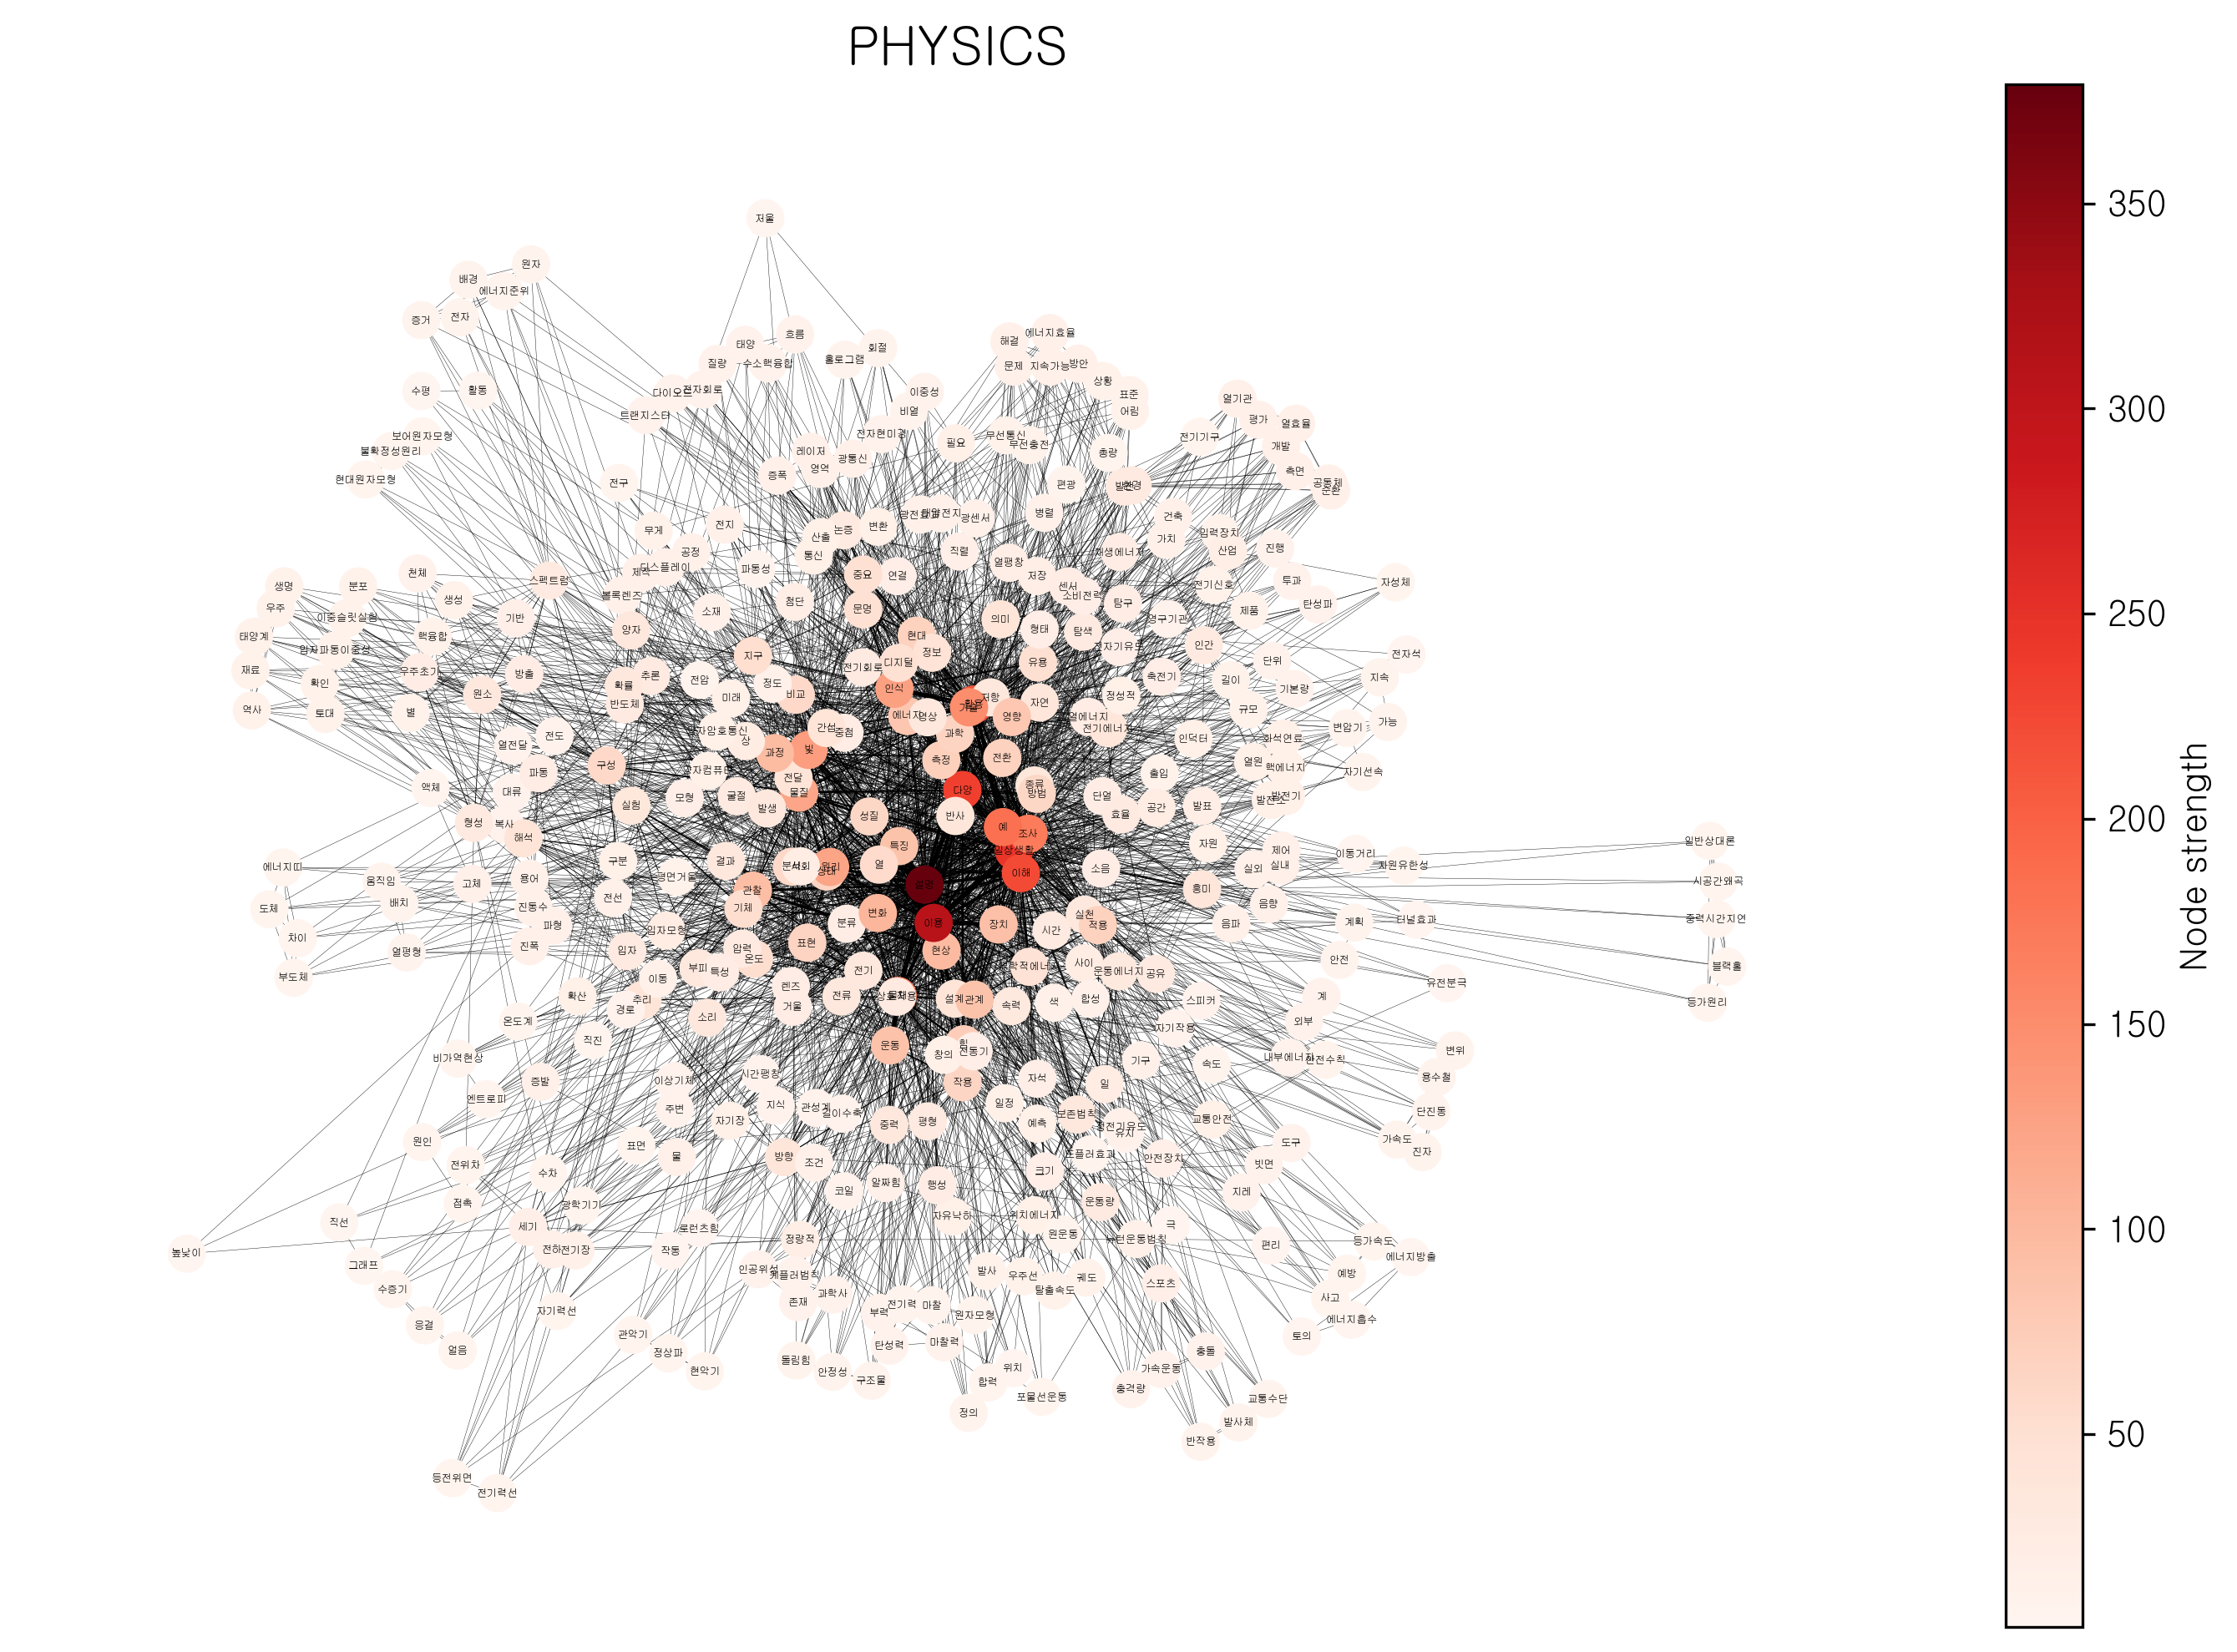

In [15]:
# 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

# 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
#node_size = [node_weights[node] * 0.1 for node in G.nodes()]
edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]

# 노드 색상 매핑을 위한 컬러맵 설정
cmap = plt.get_cmap('Reds')  # viridis 컬러맵 사용
norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

# 노드 색상 설정
node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

# 그래프 그리기
pos = nx.spring_layout(G)  # 그래프의 노드 위치 결정
fig, ax = plt.subplots(figsize=(12,8), dpi=300)
plt.title('PHYSICS', fontsize=15)
nx.draw(G, pos, with_labels=True,
        node_color=node_colors, node_size=100, width=edge_width,
        font_family = font, font_size=3)

# 컬러바
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Node strength')

plt.show()

In [16]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)

Number of nodes: 389
Number of edges: 3931
Degree avg: 20.21, Degree std: 23.73
EdgeWeight avg: 1.27, EdgeWeight std: 0.89
NodeWeight avg: 25.72, NodeWeight std: 40.47


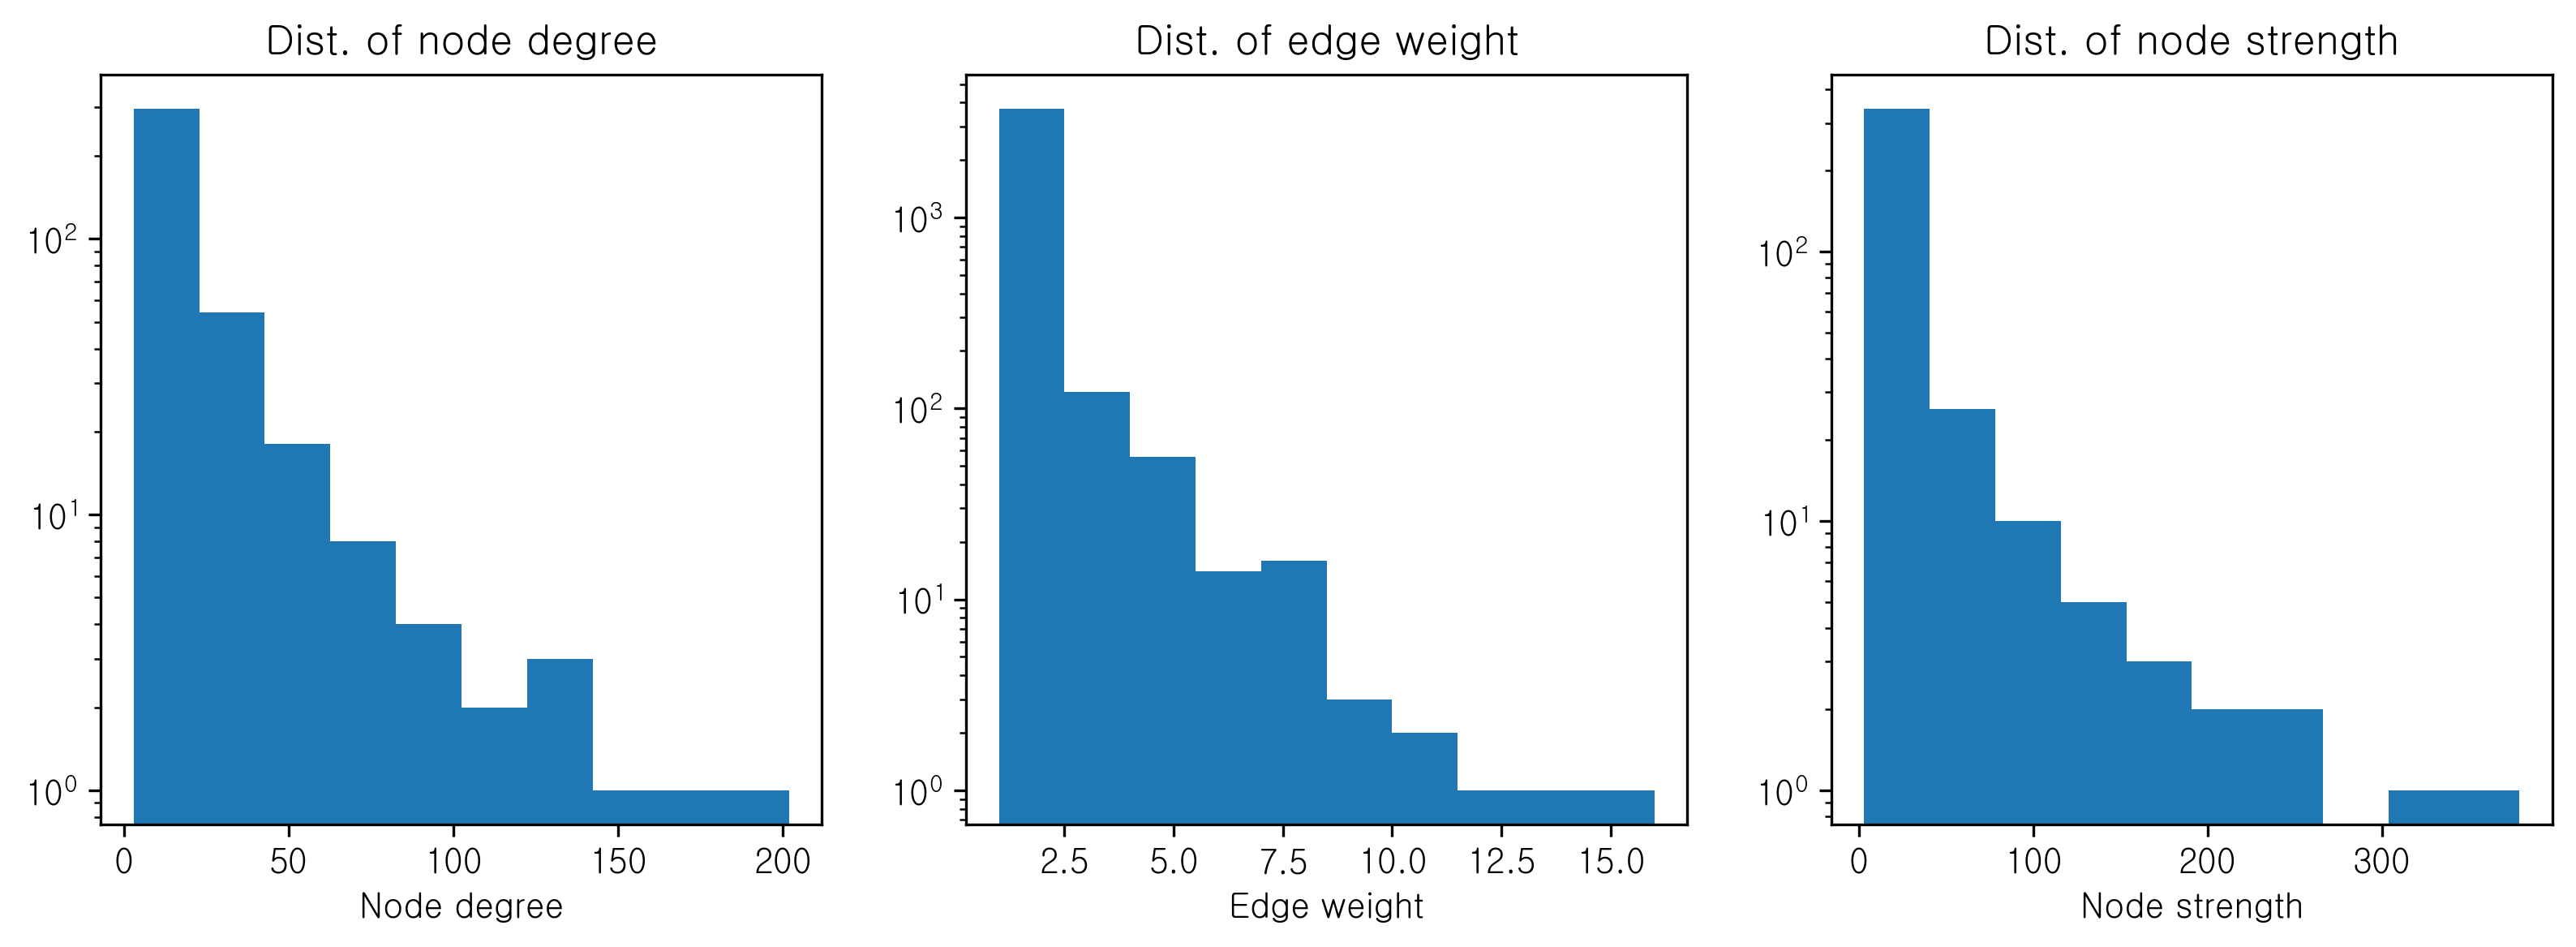

In [17]:
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [18]:
power_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

Calculating best minimal value for power law fit
Dist. of degree: Pass, 2.6497048990159278

Calculating best minimal value for power law fit
Dist. of degree: Pass, 7.712095487996254

Calculating best minimal value for power law fit
Dist. of node strength: Pass, 2.1763482342086684



C:\Users\sec\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


In [19]:
df = info(G)
df.head(20)

Node_ND  Node Degree        Edge  Edge Weight Node_NS  Node Strength  \
0       설명        202.0    (이용, 설명)           16      설명          379.0   
1       이용        165.0  (일상생활, 이용)           13      이용          309.0   
2     일상생활        144.0    (다양, 설명)           12    일상생활          247.0   
3       이해        139.0    (이용, 조사)           10      다양          234.0   
4       다양        137.0    (이용, 장치)           10      이해          222.0   
5       활용        128.0    (현상, 설명)            9      활용          214.0   
6        예        113.0    (물체, 이용)            9       예          185.0   
7       조사        108.0    (설명, 이해)            9      물체          171.0   
8       물체         94.0    (현상, 관찰)            8      조사          171.0   
9       원리         90.0    (물체, 운동)            8      기술          150.0   
10      기술         90.0  (일상생활, 조사)            8       빛          132.0   
11       빛         83.0   (일상생활, 예)            8      인식          129.0   
12      인식         79.0    (이용, 이해)            8      원리          124.0   
13      과정         78.0    (설명, 특징)            8      물질          122.0   
14      물질         77.0    (활용, 인식)            8      변화          103.0   
15      변화         70.0    (활용, 기술)            8      현상           97.0   
16     에너지         68.0    (물체, 설명)            7      과정           96.0   
17      현상         67.0  (일상생활, 다양)            7      관찰           93.0   
18      영향         65.0  (일상생활, 활용)            7      장치           92.0   
19      관찰         64.0    (이용, 다양)            7      운동           89.0   

   Node_BC  Betweenness Centrality  
0       설명                0.157062  
1       이용                0.117353  
2       이해                0.097690  
3     일상생활                0.086937  
4       다양                0.084668  
5       활용                0.077696  
6       물체                0.070829  
7        예                0.063079  
8       조사                0.060435  
9       원리                0.056064  
10       빛                0.052012  
11      기술                0.051343  
12      과정                0.045969  
13      관찰                0.045438  
14      물질                0.043400  
15      인식                0.042333  
16      변화                0.041120  
17      현상                0.040560  
18      관계                0.040459  
19      운동                0.039600

## Node Strength 기준 핵심 용어

In [20]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total Node_NS   0306 Node_NS   0709 Node_NS    10 Node_NS  11_phy  \
0      설명    379      이용  100.0      설명  102.0      다양  65.0      설명    75.0   
1      이용    309    일상생활   73.0    일상생활   71.0      기술  52.0       빛    40.0   
2    일상생활    247      조사   65.0      이용   69.0      지구  52.0      활용    39.0   
3      다양    234      물체   64.0      이해   61.0    일상생활  43.0      원리    37.0   
4      이해    222      관찰   64.0      물체   61.0      활용  42.0      다양    35.0   
5      활용    214      설명   45.0      표현   56.0      측정  38.0      적용    33.0   
6       예    185      성질   43.0      특징   49.0      자연  37.0       예    30.0   
7      물체    171      방법   39.0      다양   46.0      의미  35.0      이용    30.0   
8      조사    171      현상   38.0      운동   46.0      과정  35.0     에너지    26.0   
9      기술    150       예   34.0      물질   45.0      구성  33.0      기술    25.0   

  Node_NS  12_phy_cm Node_NS  12_phy_eqm  
0      설명       88.0      기술        61.0  
1      이해       85.0      활용        53.0  
2      이용       62.0       빛        44.0  
3       예       52.0      설명        42.0  
4      다양       49.0      원리        38.0  
5      활용       49.0      조사        38.0  
6      물체       29.0      인식        37.0  
7      조사       26.0     디지털        33.0  
8       열       26.0      확률        32.0  
9      운동       25.0      이해        31.0

## Betweenness Centrality 기준 핵심 용어

In [21]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total Node_BC      0306 Node_BC      0709 Node_BC        10  \
0      설명  0.157062      이용  0.217404      설명  0.203593      다양  0.178566   
1      이용  0.117353      물체  0.185977    일상생활  0.137948      적용  0.174896   
2      이해  0.097690      관찰  0.180783      물체  0.131425      지구  0.170978   
3    일상생활  0.086937    일상생활  0.140524      이용  0.127234      기술  0.139082   
4      다양  0.084668      조사  0.131860      운동  0.124501    일상생활  0.135013   
5      활용  0.077696      설명  0.123765      이해  0.117064      과정  0.109882   
6      물체  0.070829      비교  0.109377      표현  0.109710      의미  0.106438   
7       예  0.063079      성질  0.092532      물질  0.098252      활용  0.094342   
8      조사  0.060435      현상  0.082280      관계  0.092026      자연  0.090540   
9      원리  0.056064      방법  0.080676      과정  0.083015      설명  0.085448   

  Node_BC    11_phy Node_BC  12_phy_cm Node_BC  12_phy_eqm  
0      설명  0.355189      설명   0.319073      기술    0.202466  
1      적용  0.175339      이해   0.316466      설명    0.190485  
2      다양  0.175326      이용   0.194349      이용    0.164825  
3      논증  0.143430      다양   0.162439       빛    0.157158  
4      원리  0.141487       예   0.152214      활용    0.153970  
5       예  0.139287      활용   0.148446      추리    0.149024  
6       빛  0.121124       열   0.088626      원리    0.146557  
7      활용  0.107025      물체   0.071094      확률    0.133925  
8      전환  0.093537      운동   0.066415      인식    0.111917  
9     에너지  0.090565    일상생활   0.060420      조사    0.095564

In [20]:
G = entire_Graph()

In [21]:
# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp = nx.community.greedy_modularity_communities(G, weight='weight')
communities = list(comp)

len(communities)

15

In [22]:
# 모듈도
nx.community.modularity(G, comp)

0.5999817883809871

In [23]:
# 모든 연결 성분 찾기
connected_components = list(nx.connected_components(G))

# 가장 큰 연결 성분 찾기
giant_component = max(connected_components, key=len)

# 가장 큰 연결 성분으로 구성된 서브그래프 생성
G_giant = G.subgraph(giant_component)

# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp_giant = nx.community.greedy_modularity_communities(G_giant, weight='weight')
communities_giant = list(comp_giant)

len(communities_giant) # Largest component에서의 커뮤니티 수

7

In [24]:
# 각 커뮤니티를 구성하는 노드 수
for i in communities_giant:
    print(len(i))

51
46
34
32
30
18
13


In [25]:
# 각 커뮤니티를 구성하는 단어
for i in range(7):

    lst = []
    for i in communities_giant[i]:
        lst.append(i)

    print(lst)
    print()

['탄성파', '합성', '축전기', '전기회로', '핵에너지', '열원', '질량', '빛', '센서', '전지', '전선', '병렬', '자기선속', '발전기', '자기장', '자원', '굴절', '전환', '수소핵융합', '에너지', '저항', '소비전력', '자기작용', '흐름', '코일', '영구기관', '전자기유도', '역학적에너지', '전동기', '태양', '인덕터', '변압기', '모형', '반사', '연결', '전기신호', '투과', '입력장치', '진행', '볼록렌즈', '스피커', '자기력선', '전구', '전기에너지', '경로', '전기기구', '화석연료', '전압', '보존법칙', '직렬', '전류']

['합력', '탄성력', '그래프', '직선', '이동거리', '지레', '원운동', '시간', '극', '빗면', '안정성', '뉴턴운동법칙', '운동', '도플러효과', '위치', '관성계', '돌림힘', '평형', '방향', '시간팽창', '도구', '수평', '일', '자석', '등가속도', '길이수축', '위치에너지', '마찰력', '속도', '행성', '포물선운동', '운동에너지', '알짜힘', '크기', '부력', '무게', '속력', '인공위성', '물체', '케플러법칙', '중력', '저울', '힘', '작용', '자유낙하', '공유']

['복사', '이중슬릿실험', '열전달', '음파', '양자암호통신', '보어원자모형', '관악기', '양자', '진폭', '진동수', '불확정성원리', '정상파', '전달', '확률', '대류', '중첩', '파동성', '소음', '분포', '현대원자모형', '파형', '입자파동이중성', '길이', '공간', '전도', '소리', '회절', '양자컴퓨터', '현악기', '간섭', '홀로그램', '제어', '파동', '음향']

['충돌', '운동량', '전기장', '충격량', '발사', '전기력선', '탈출속도', '광통신', '등전위면', '높낮이', '레이저', '마찰', '우주선

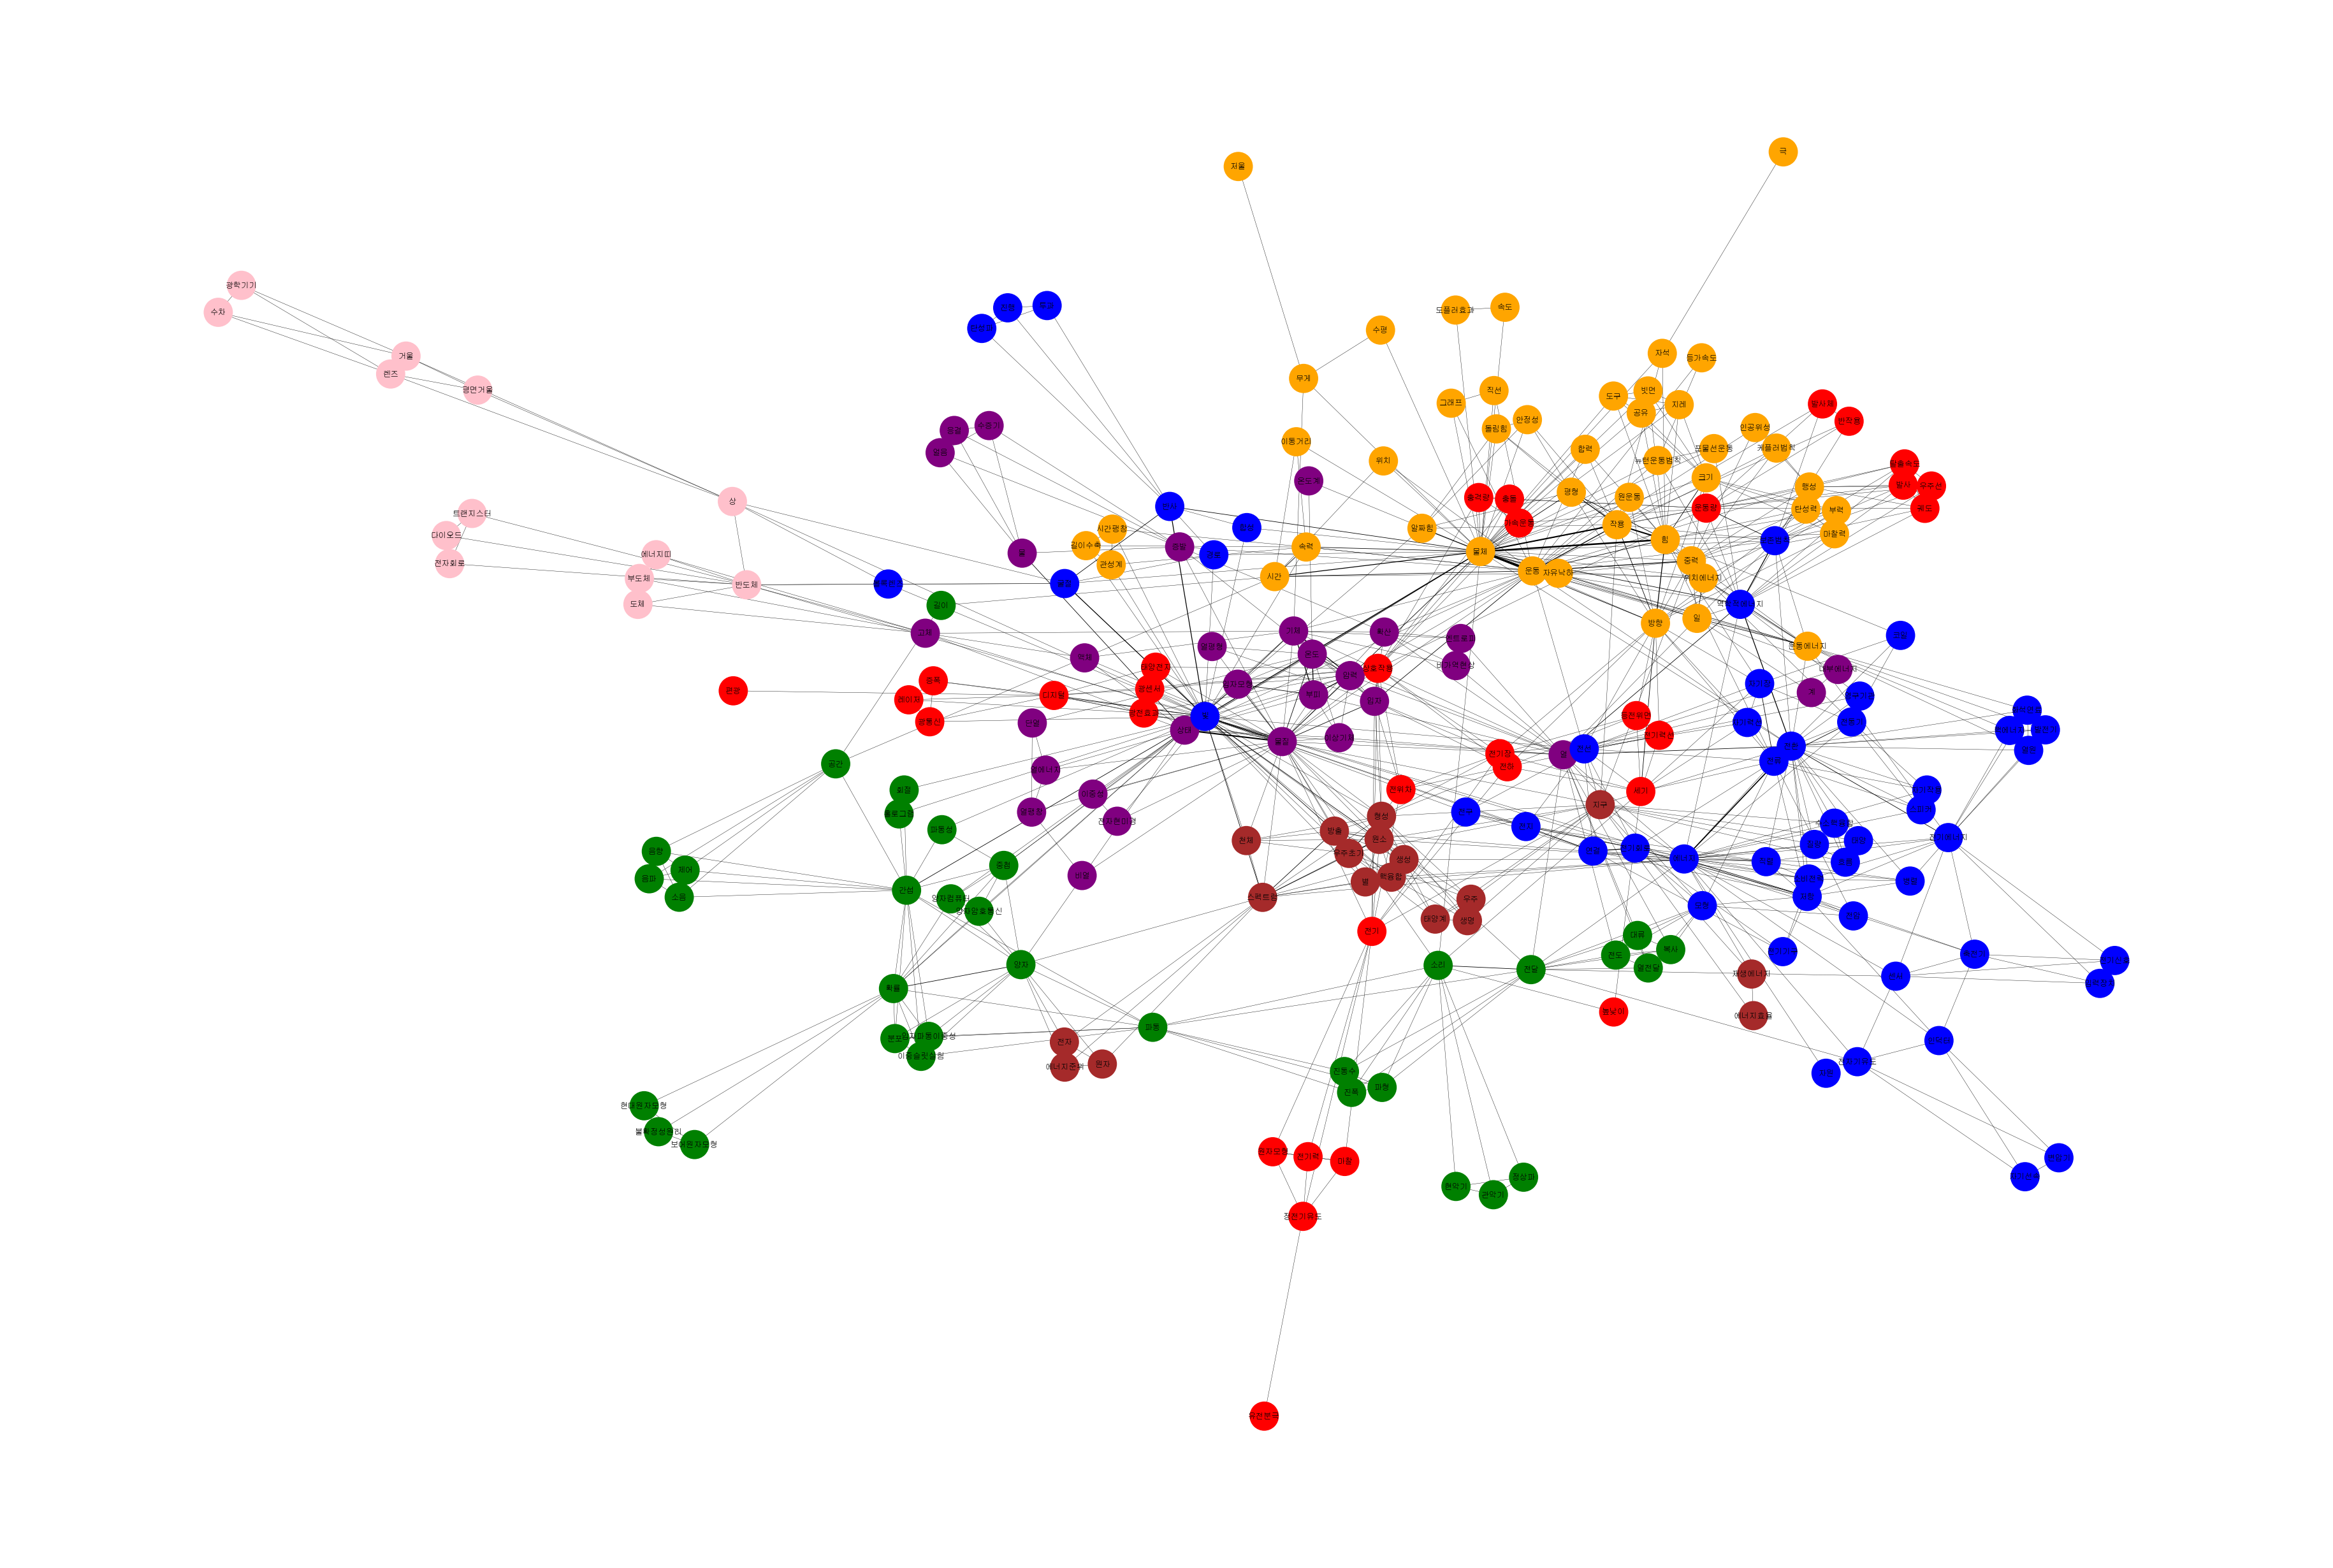

In [26]:
# 커뮤니티별로 색상 지정
colors = itertools.cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])  # 필요한 색상 리스트

node_colors = {}
for community, color in zip(communities_giant, colors):
    for node in community:
        node_colors[node] = color

# 노드 색상 리스트 생성
node_color_list = [node_colors[node] for node in G_giant.nodes()]

# 그래프 레이아웃 설정
pos = nx.fruchterman_reingold_layout(G_giant, k=1, iterations=1000, weight='weight')  # 그래프의 노드 위치 결정

edge_weights = {(u, v): data['weight'] for u, v, data in G_giant.edges(data=True)}
edge_width = [edge_weights[edge] * 0.1 for edge in G_giant.edges()]

# 그래프 시각화
plt.figure(figsize=(12,8), dpi=300)
nx.draw(G_giant, pos, with_labels=True, node_color=node_color_list, width=edge_width, node_size=100, font_family = font, font_size=3)
plt.show()

In [27]:
sum_matrix = np.zeros((7,7))

for i in range(7):
    for j in range(7):
        sum_comp = []
        for x in range(len(list(communities_giant[i]))):
            for y in range(len(list(communities_giant[j]))):
                s = list(communities_giant[i])[x]
                t = list(communities_giant[j])[y]
                sum_comp.append(nx.shortest_path_length(G_giant, source=s, target=t))
        sum_matrix[i][j] = np.average(sum_comp)

lst = []
for idx, data in enumerate(sum_matrix):
    # 제외할 인덱스
    index_to_exclude = idx
    # 새로운 리스트 생성 (index_to_exclude 인덱스를 제외한 리스트)
    filtered_data = [value for i, value in enumerate(data) if i != index_to_exclude]
    print(np.average(filtered_data))
    lst.append(np.average(filtered_data))

3.3047137417204113
3.2521607632740945
3.5045989763016707
3.386801946484651
3.1835904198635974
3.0902208675492986
3.9352537233771243


Text(0, 0.5, 'Average shortest path length')

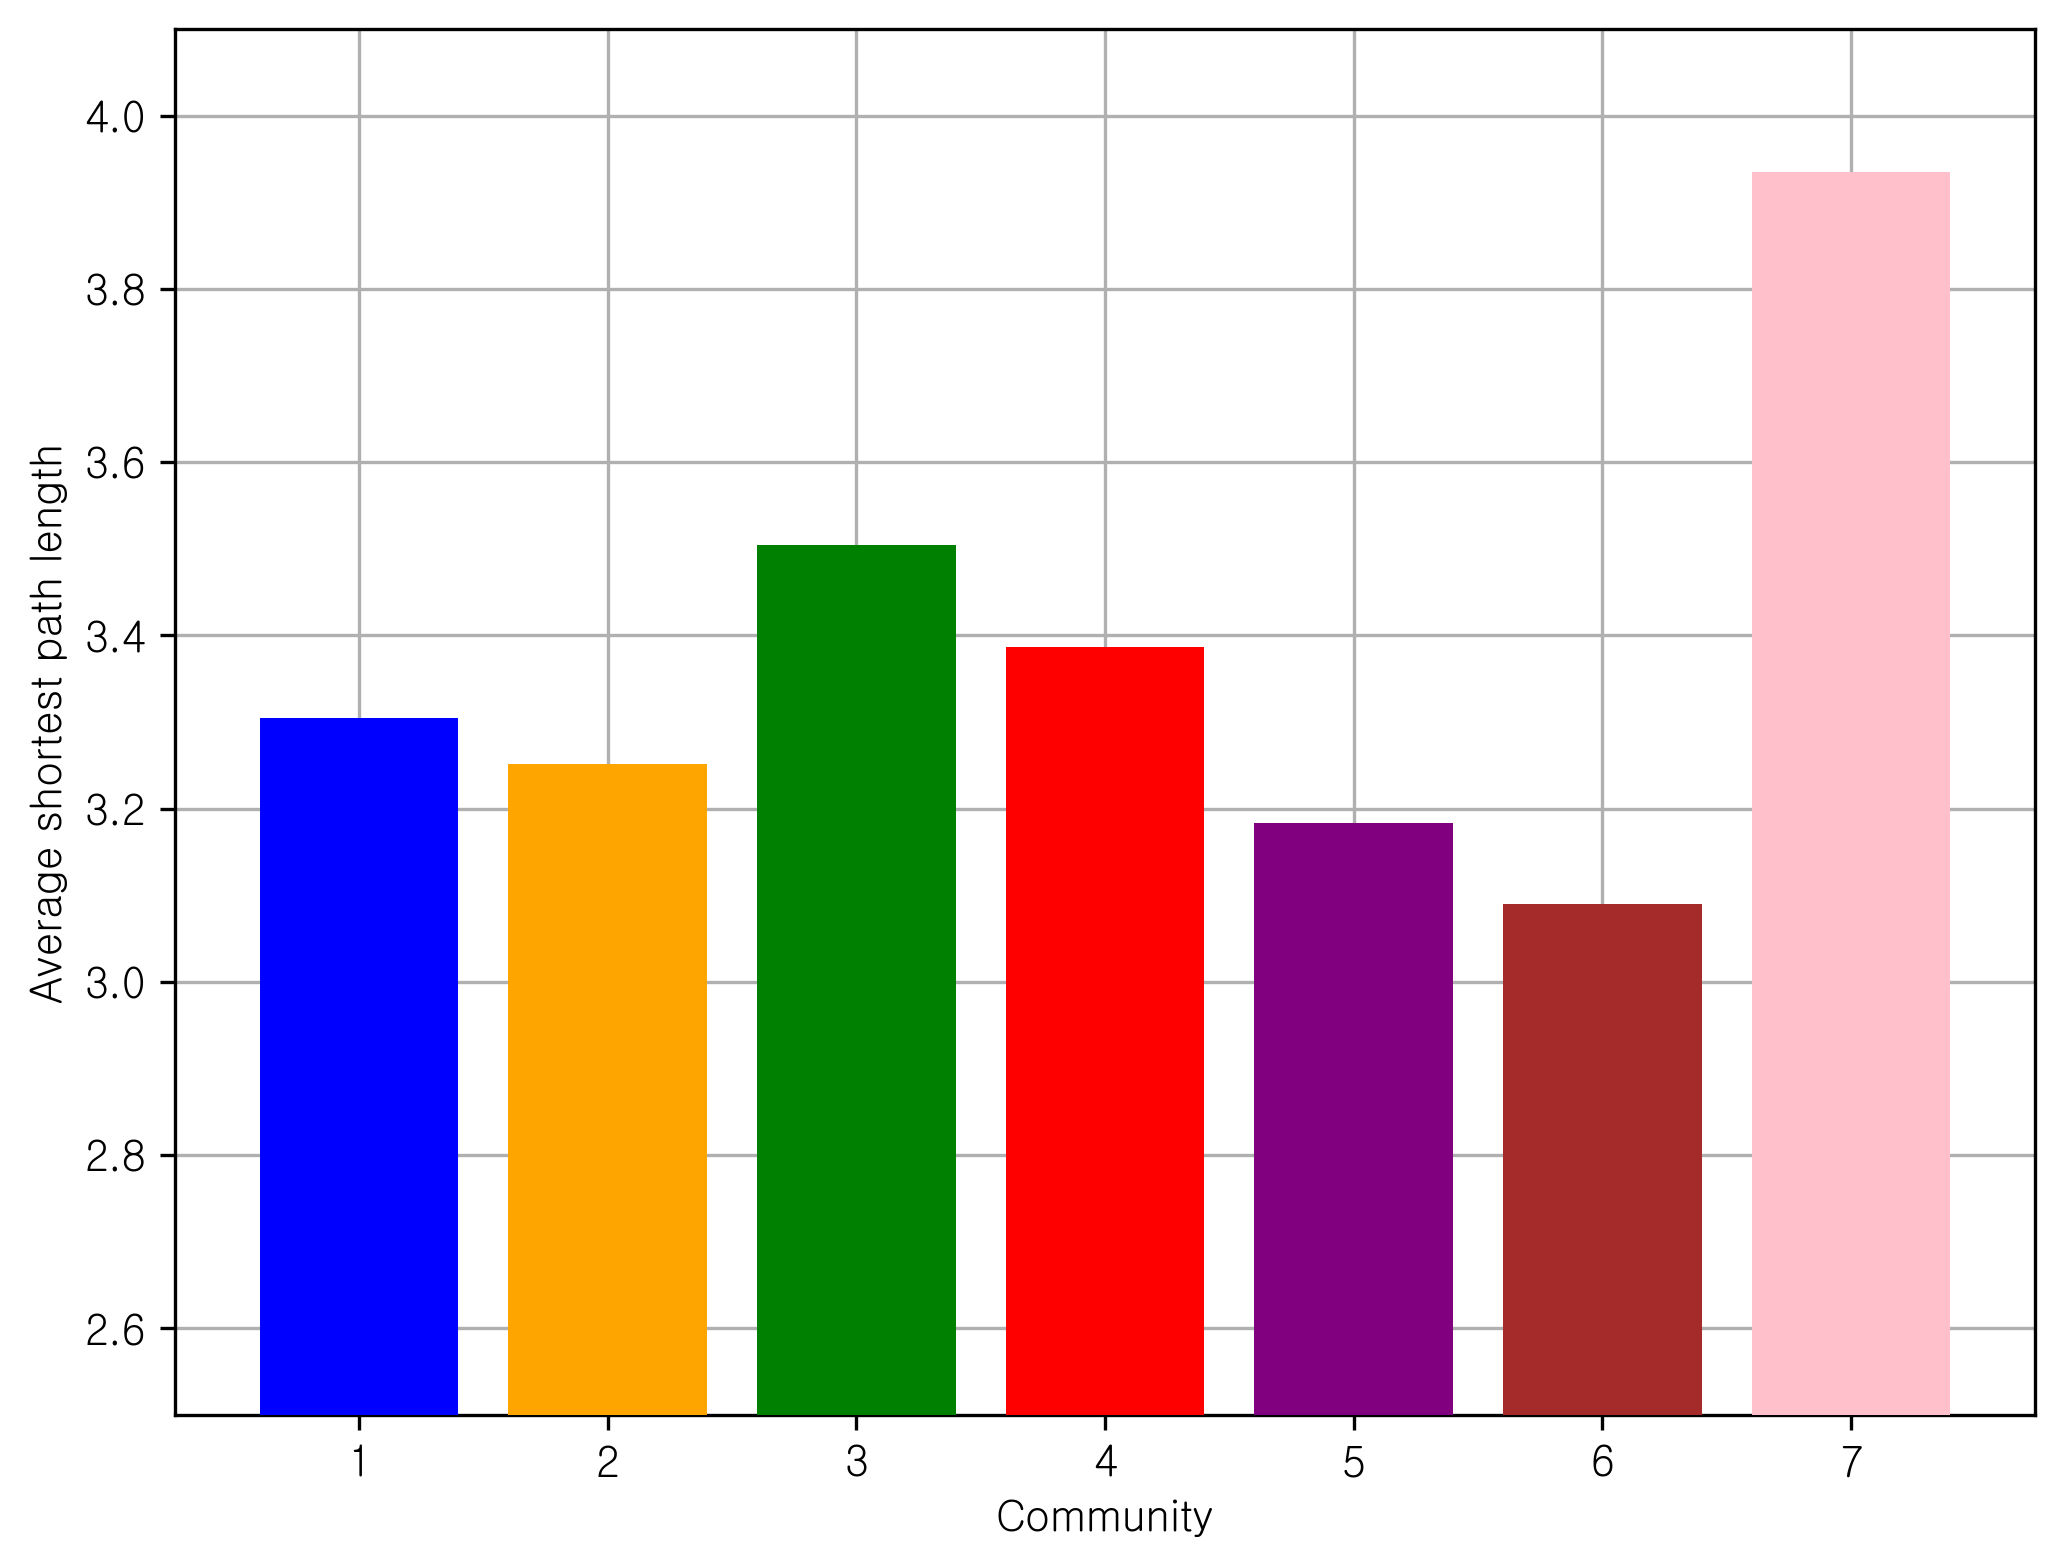

In [29]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# 그리드를 그리기 (zorder를 낮게 설정)
ax.grid(True, zorder=0)

# 막대 그래프 그리기 (zorder를 높게 설정)
x_labels = range(1, 8)
ax.bar(x_labels, lst, color=colors, zorder=3)
ax.set_xticks(x_labels)
ax.set_ylim(2.5, 4.1)

plt.xlabel('Community')
plt.ylabel('Average shortest path length')

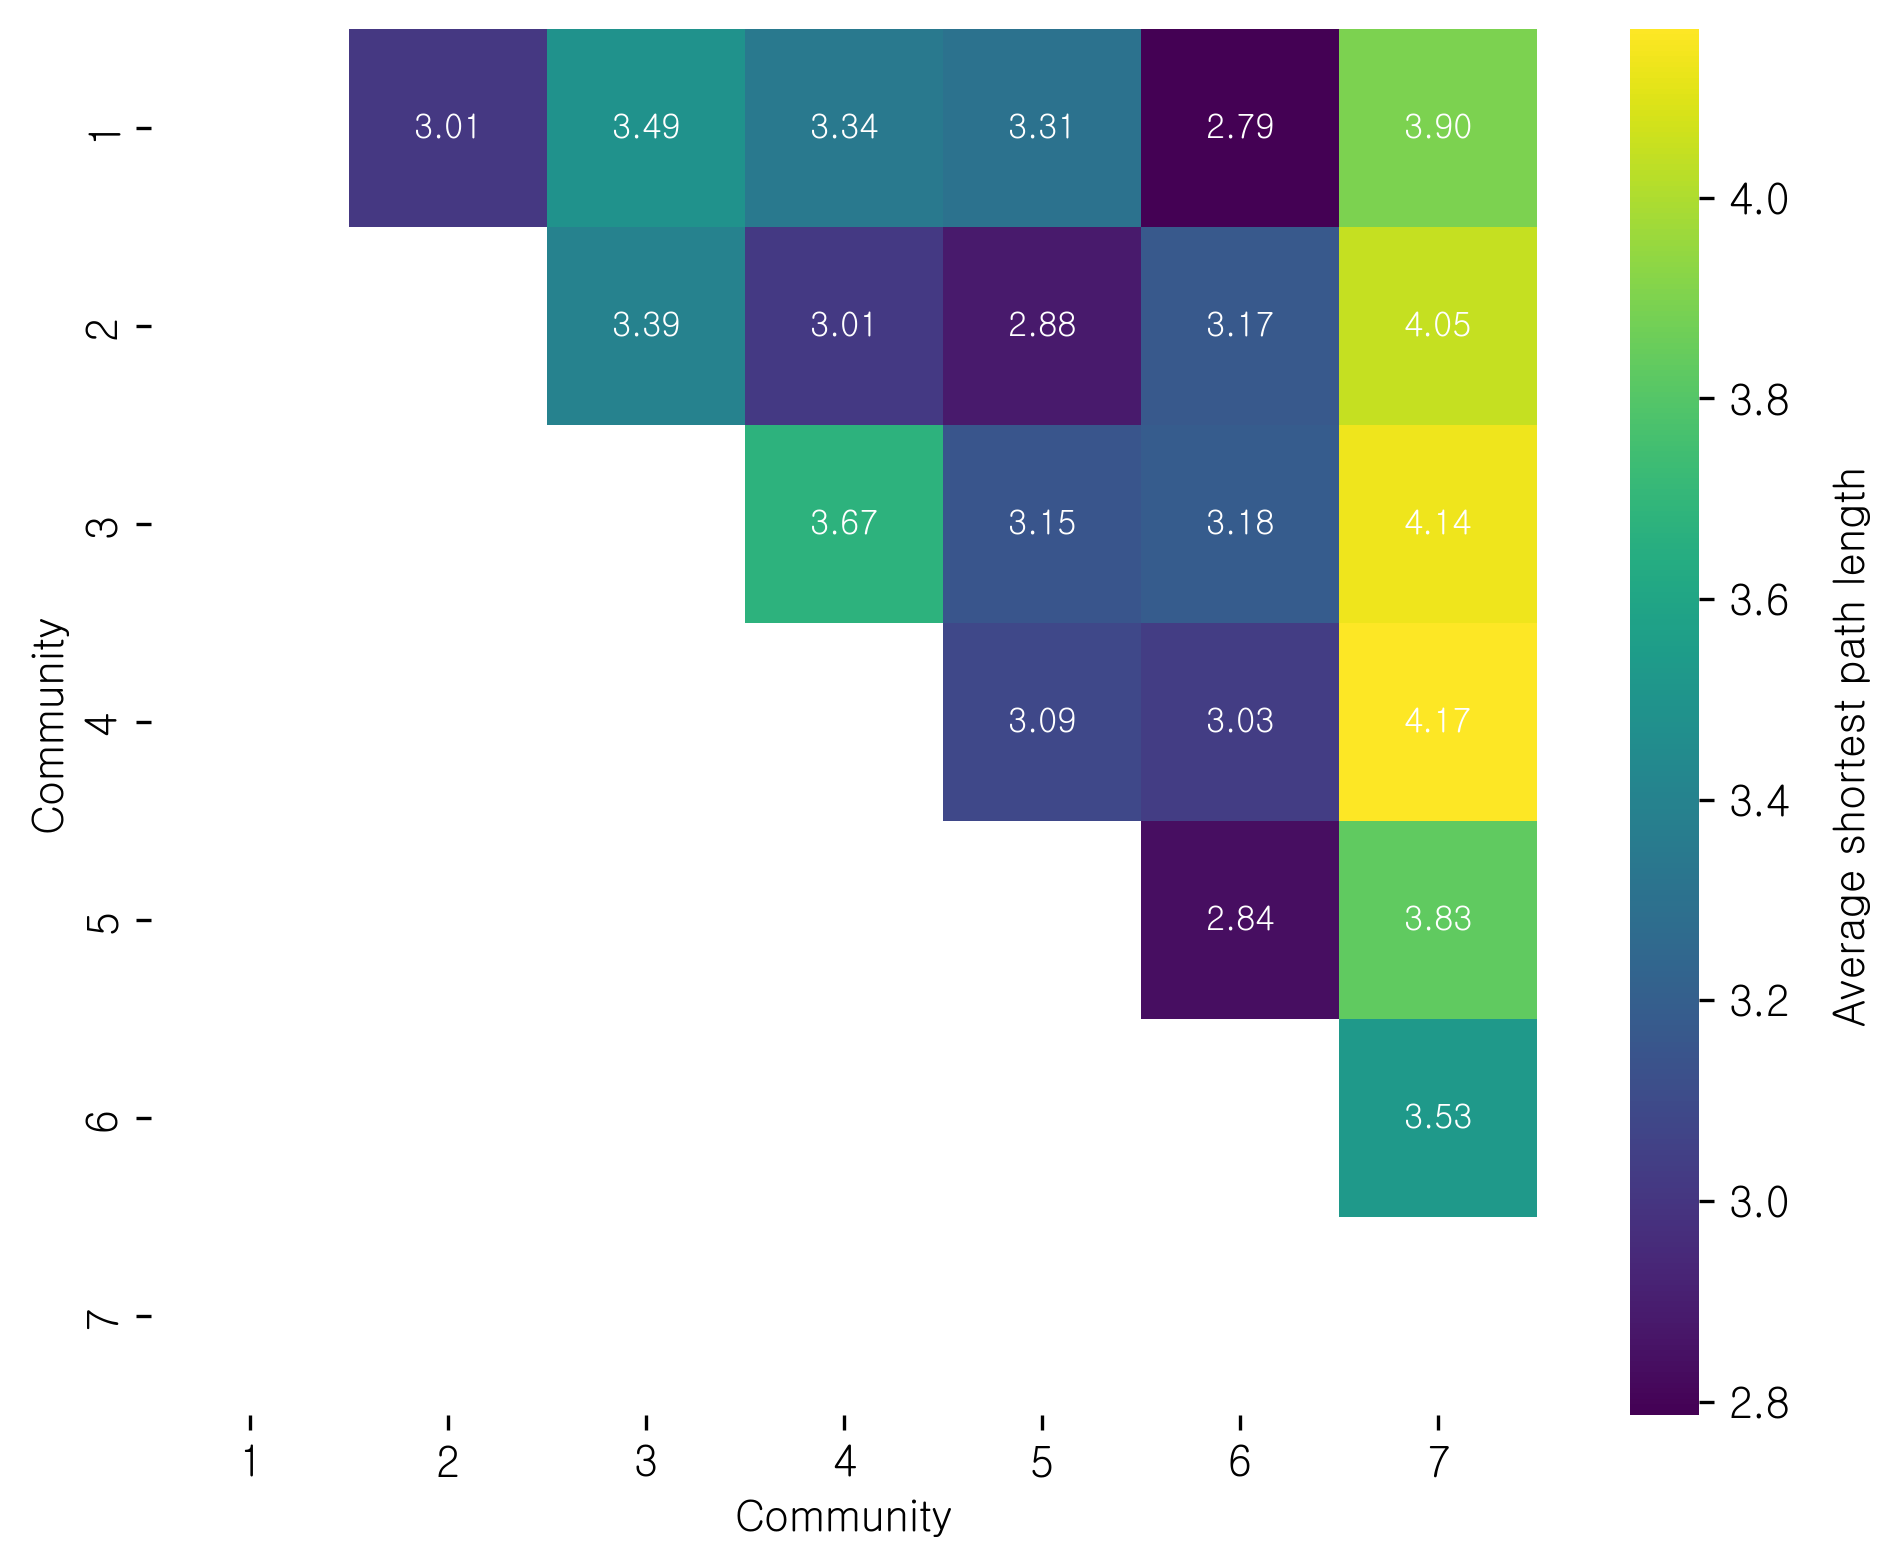

In [30]:
matrix = sum_matrix

# 좌하단 삼각형 부분만 남기고 나머지는 NaN으로 설정
mask = np.tri(*matrix.shape, k=-1).T
masked_matrix = np.where(mask, matrix, np.nan)
labels = np.arange(1, 8)

# 히트맵 그리기
plt.figure(figsize=(8, 6), dpi=300)
heatmap = sns.heatmap(masked_matrix, annot=False, fmt=".2f", cmap="viridis", cbar=True, square=True, xticklabels=labels, yticklabels=labels)

for i in range(masked_matrix.shape[0]):
    for j in range(masked_matrix.shape[1]):
        if not np.isnan(masked_matrix[i, j]):
            heatmap.text(j + 0.5, i + 0.5, f'{masked_matrix[i, j]:.2f}', 
                         ha='center', va='center', fontsize=8, color='white')

plt.xlabel('Community')
plt.ylabel('Community')

plt.text(8.5,5.0,'Average shortest path length', rotation=90)

plt.show()

# 2. 개별 교과(목) 네트워크

## 초3-6

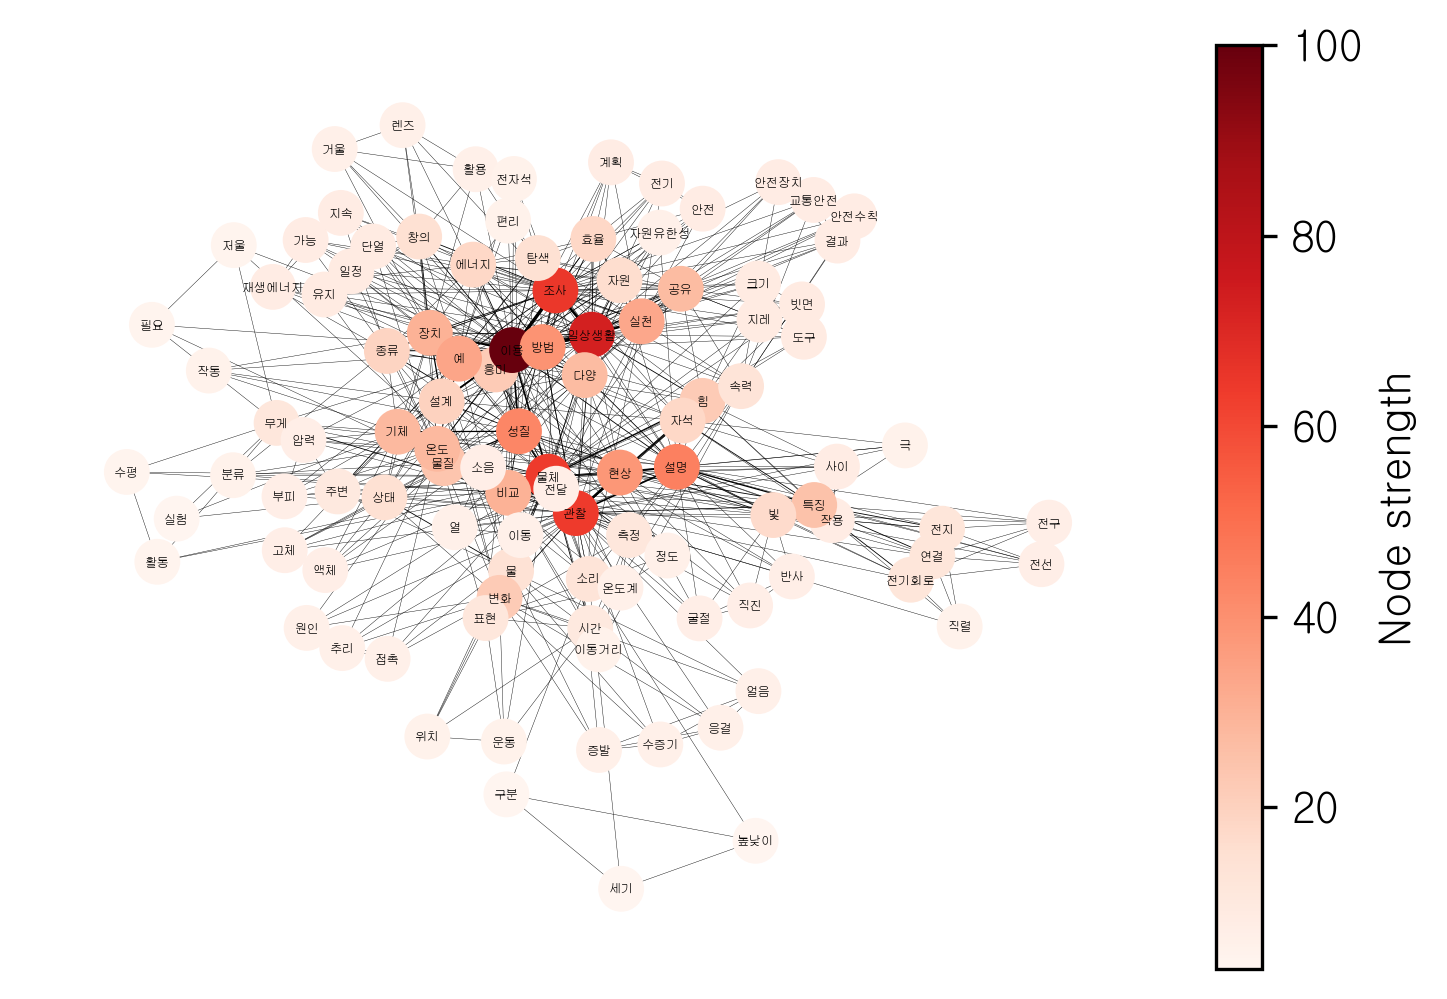

In [24]:
subject_graph(200, 1, 1.5, file_lst[0])

In [25]:
G = graph(file_lst[0])

Number of nodes: 105
Number of edges: 637
Degree avg: 12.13, Degree std: 10.06
EdgeWeight avg: 1.24, EdgeWeight std: 0.69
NodeWeight avg: 15.07, NodeWeight std: 16.24


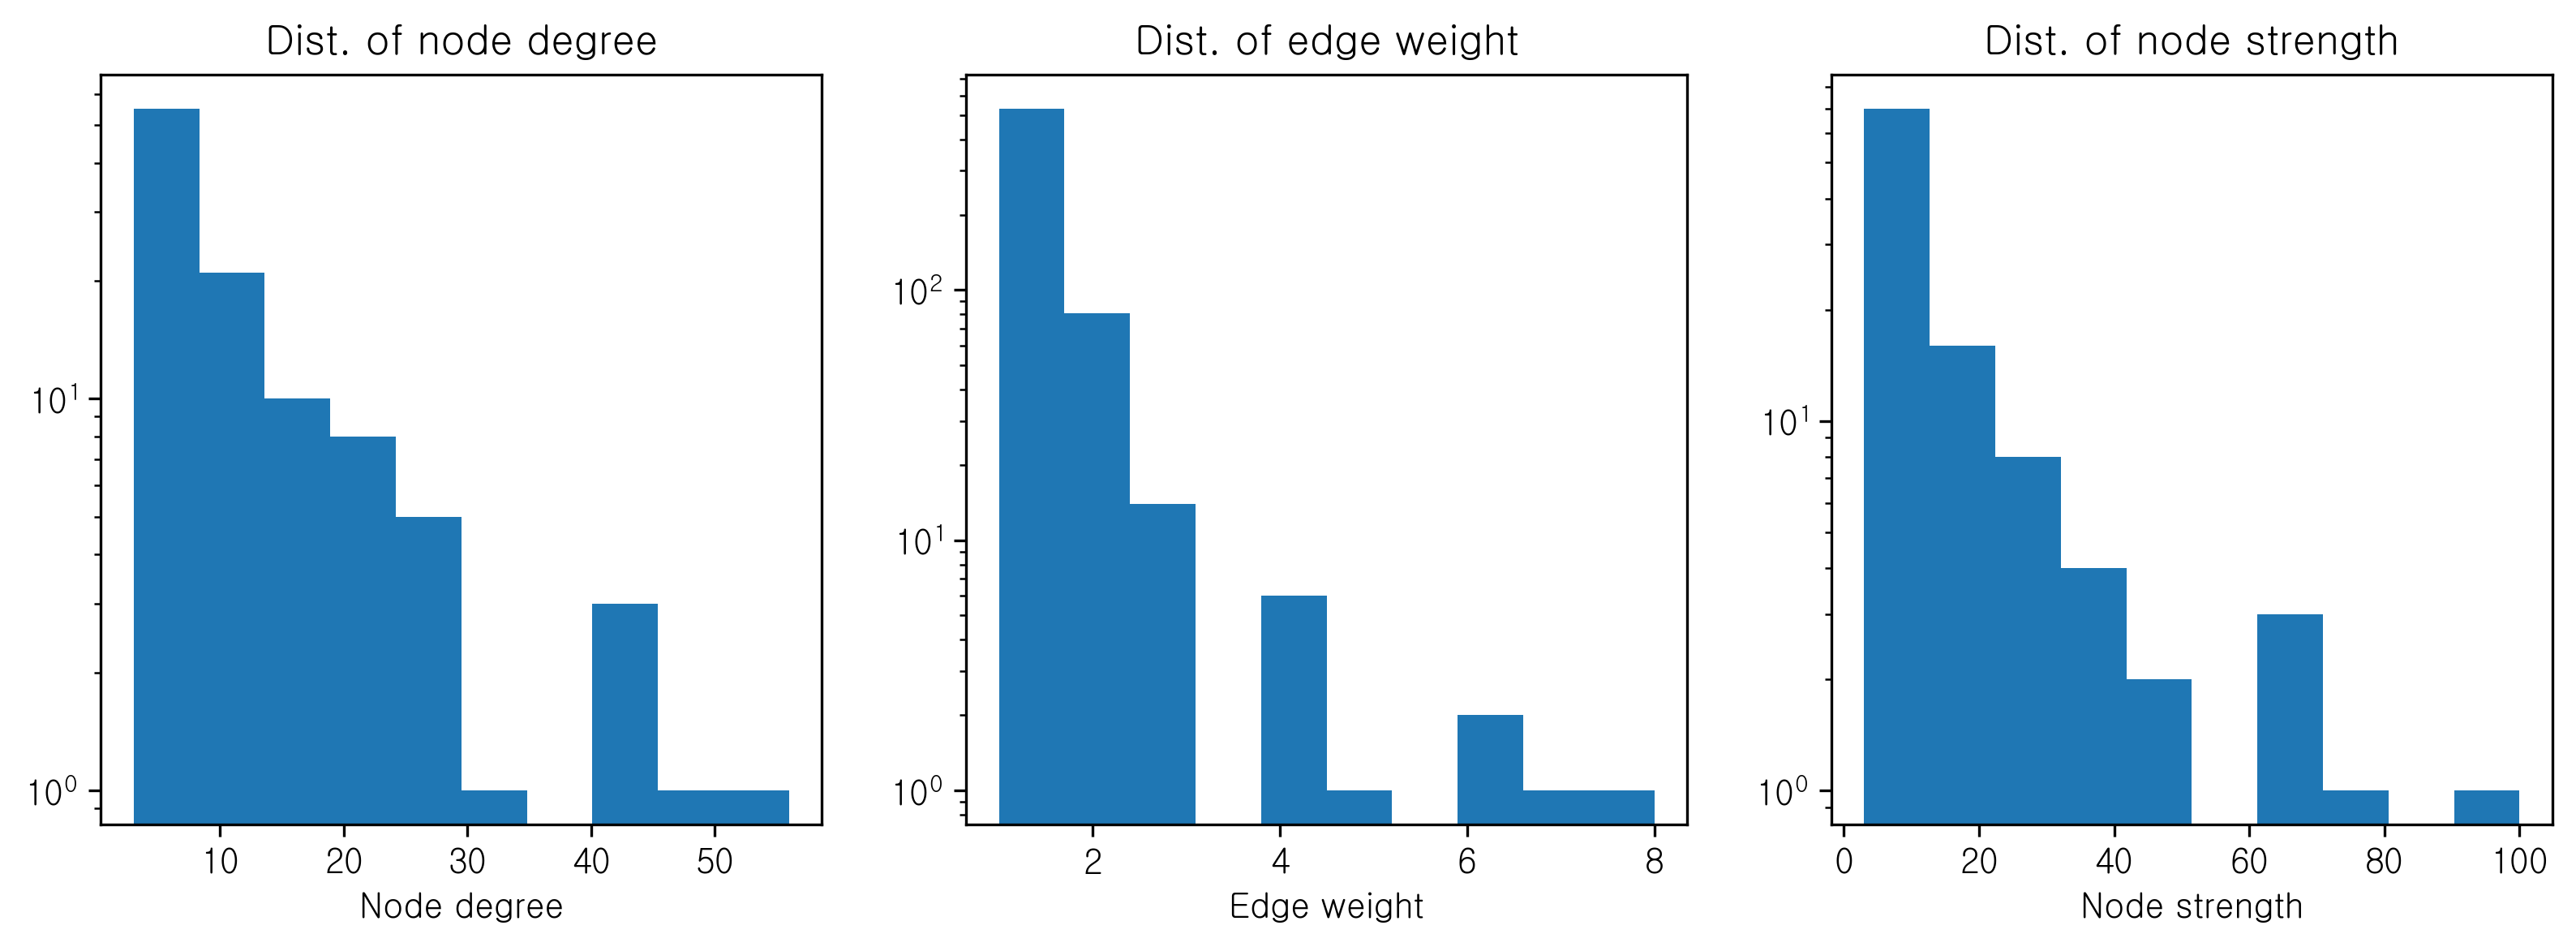

In [26]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [27]:
df = info(G)
df.head(20)

Node_ND  Node Degree        Edge  Edge Weight Node_NS  Node Strength  \
0       이용         56.0    (이용, 조사)            8      이용          100.0   
1     일상생활         46.0  (일상생활, 이용)            7    일상생활           73.0   
2       관찰         44.0    (현상, 관찰)            6      조사           65.0   
3       조사         44.0  (일상생활, 조사)            6      물체           64.0   
4       물체         43.0    (이용, 장치)            5      관찰           64.0   
5       설명         32.0    (현상, 설명)            4      설명           45.0   
6       방법         28.0    (물체, 이용)            4      성질           43.0   
7       성질         27.0  (일상생활, 실천)            4      방법           39.0   
8        예         27.0    (관찰, 설명)            4      현상           38.0   
9       현상         26.0    (이용, 성질)            4       예           34.0   
10      비교         25.0    (이용, 설계)            4      실천           33.0   
11      기체         24.0     (물체, 힘)            3      비교           30.0   
12      실천         24.0    (물체, 관찰)            3      장치           30.0   
13      온도         24.0    (물체, 비교)            3      기체           28.0   
14      공유         22.0    (물체, 성질)            3      온도           28.0   
15      다양         21.0  (일상생활, 공유)            3      공유           27.0   
16      장치         21.0  (일상생활, 방법)            3      다양           27.0   
17      물질         19.0    (이용, 다양)            3      특징           25.0   
18      변화         19.0     (이용, 예)            3      물질           24.0   
19       힘         17.0    (이용, 방법)            3      흥미           22.0   

   Node_BC  Betweenness Centrality  
0       이용                0.217404  
1       물체                0.185977  
2       관찰                0.180783  
3     일상생활                0.140524  
4       조사                0.131860  
5       설명                0.123765  
6       비교                0.109377  
7       성질                0.092532  
8       현상                0.082280  
9       방법                0.080676  
10      변화                0.077649  
11      온도                0.077290  
12      소리                0.074272  
13       예                0.070495  
14      실천                0.067423  
15      장치                0.066295  
16      특징                0.065910  
17      기체                0.064836  
18      물질                0.054934  
19      공유                0.050951

## 중1-3

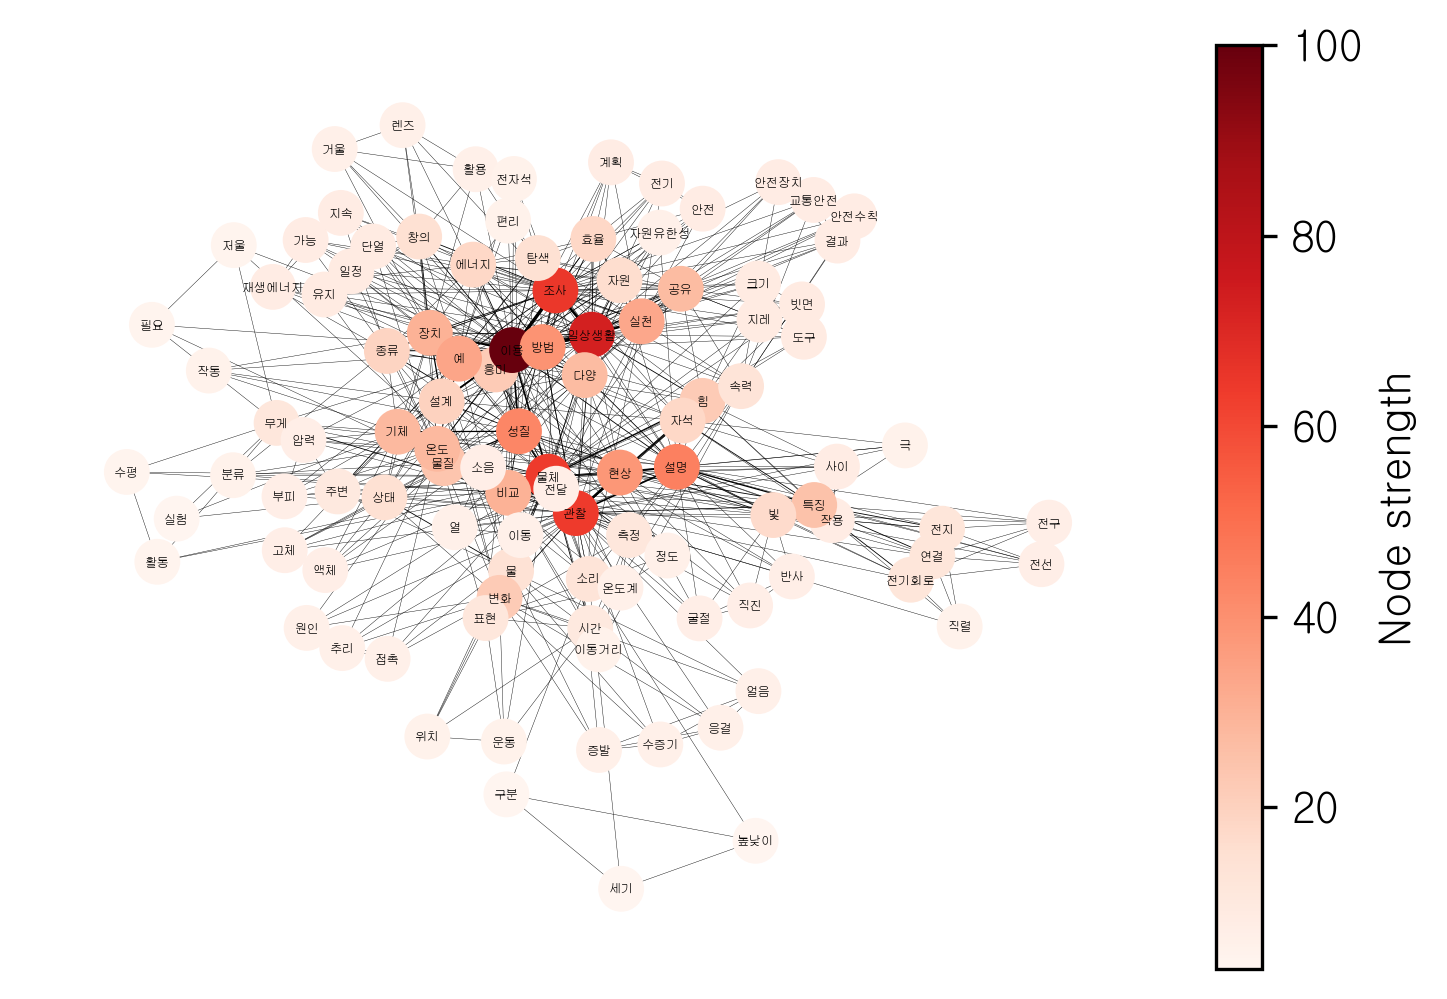

In [28]:
subject_graph(200, 1, 1.5, file_lst[0])

In [29]:
G = graph(file_lst[0])

Number of nodes: 105
Number of edges: 637
Degree avg: 12.13, Degree std: 10.06
EdgeWeight avg: 1.24, EdgeWeight std: 0.69
NodeWeight avg: 15.07, NodeWeight std: 16.24


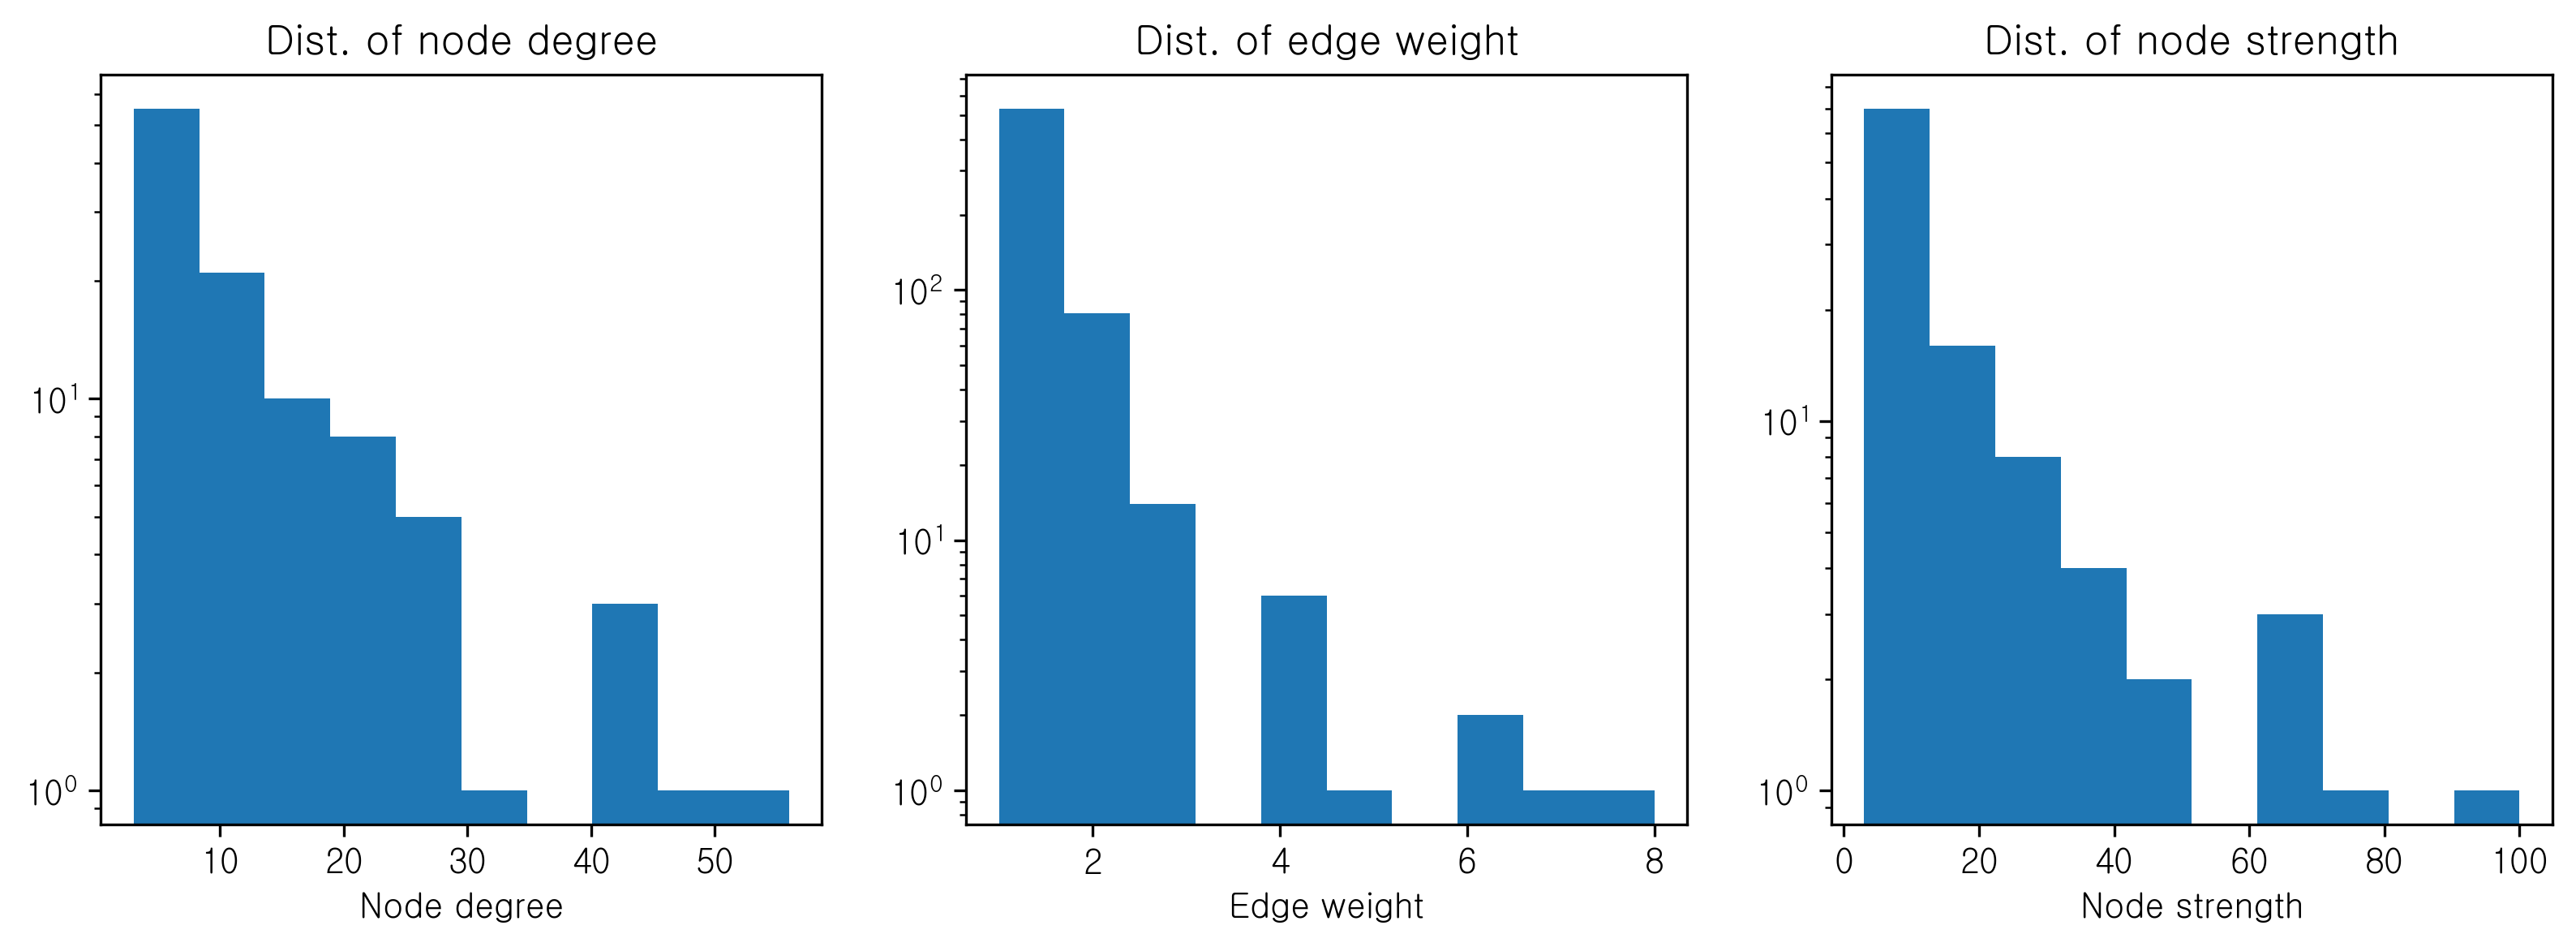

In [30]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [31]:
df = info(G)
df.head(20)

Node_ND  Node Degree        Edge  Edge Weight Node_NS  Node Strength  \
0       이용         56.0    (이용, 조사)            8      이용          100.0   
1     일상생활         46.0  (일상생활, 이용)            7    일상생활           73.0   
2       관찰         44.0    (현상, 관찰)            6      조사           65.0   
3       조사         44.0  (일상생활, 조사)            6      물체           64.0   
4       물체         43.0    (이용, 장치)            5      관찰           64.0   
5       설명         32.0    (현상, 설명)            4      설명           45.0   
6       방법         28.0    (물체, 이용)            4      성질           43.0   
7       성질         27.0  (일상생활, 실천)            4      방법           39.0   
8        예         27.0    (관찰, 설명)            4      현상           38.0   
9       현상         26.0    (이용, 성질)            4       예           34.0   
10      비교         25.0    (이용, 설계)            4      실천           33.0   
11      기체         24.0     (물체, 힘)            3      비교           30.0   
12      실천         24.0    (물체, 관찰)            3      장치           30.0   
13      온도         24.0    (물체, 비교)            3      기체           28.0   
14      공유         22.0    (물체, 성질)            3      온도           28.0   
15      다양         21.0  (일상생활, 공유)            3      공유           27.0   
16      장치         21.0  (일상생활, 방법)            3      다양           27.0   
17      물질         19.0    (이용, 다양)            3      특징           25.0   
18      변화         19.0     (이용, 예)            3      물질           24.0   
19       힘         17.0    (이용, 방법)            3      흥미           22.0   

   Node_BC  Betweenness Centrality  
0       이용                0.217404  
1       물체                0.185977  
2       관찰                0.180783  
3     일상생활                0.140524  
4       조사                0.131860  
5       설명                0.123765  
6       비교                0.109377  
7       성질                0.092532  
8       현상                0.082280  
9       방법                0.080676  
10      변화                0.077649  
11      온도                0.077290  
12      소리                0.074272  
13       예                0.070495  
14      실천                0.067423  
15      장치                0.066295  
16      특징                0.065910  
17      기체                0.064836  
18      물질                0.054934  
19      공유                0.050951

## 통합과학

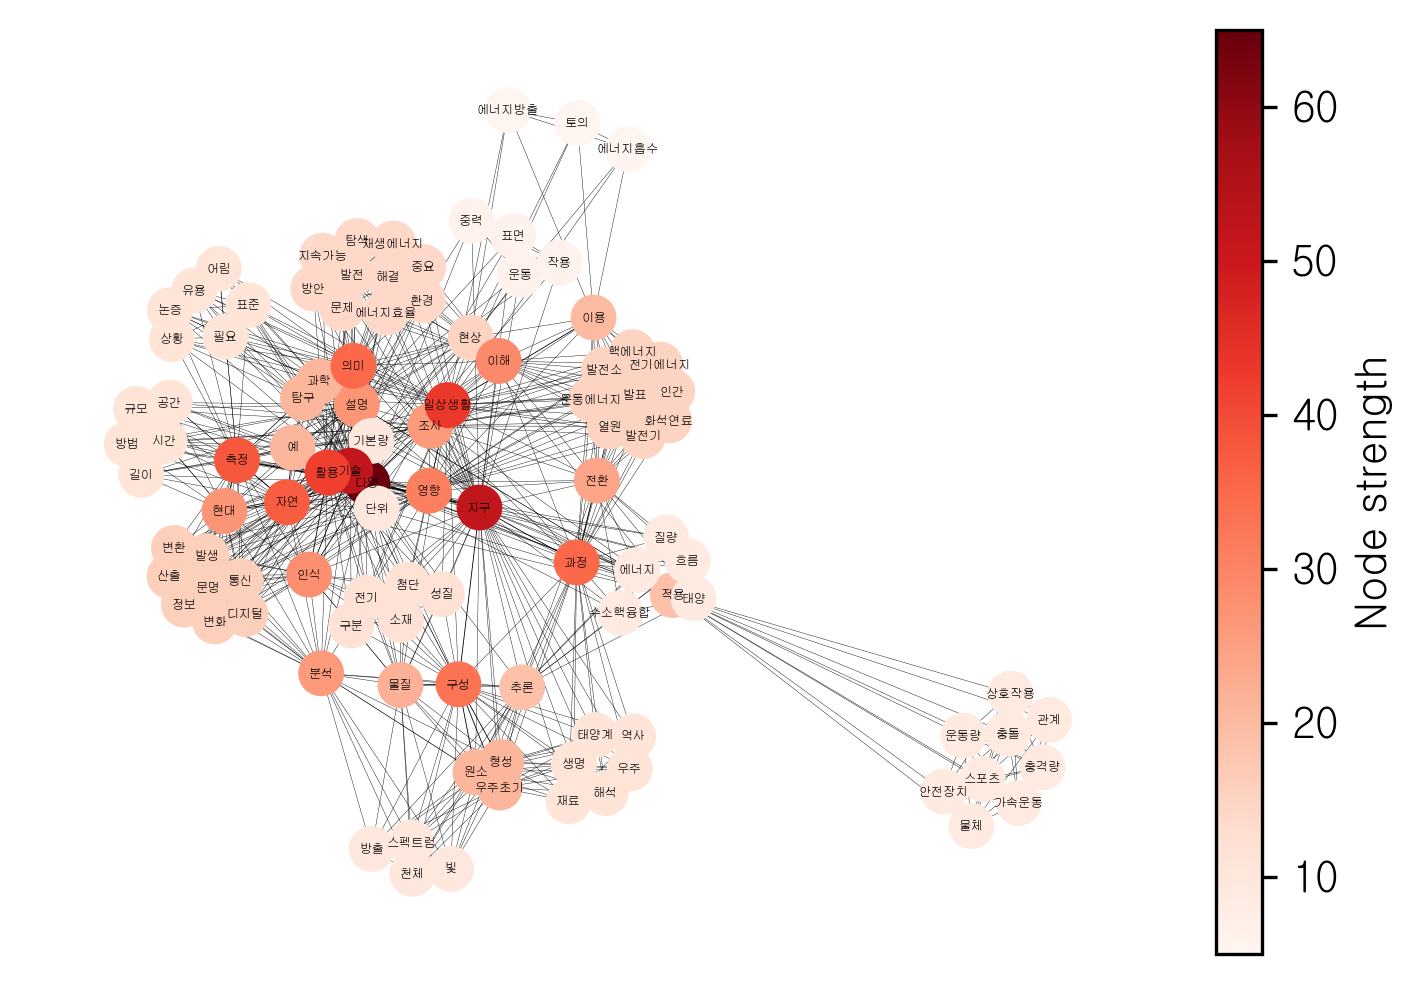

In [32]:
subject_graph(220,51, 1.5, file_lst[2])

In [33]:
G = graph(file_lst[2])

Number of nodes: 105
Number of edges: 834
Degree avg: 15.89, Degree std: 9.08
EdgeWeight avg: 1.05, EdgeWeight std: 0.23
NodeWeight avg: 16.63, NodeWeight std: 10.59


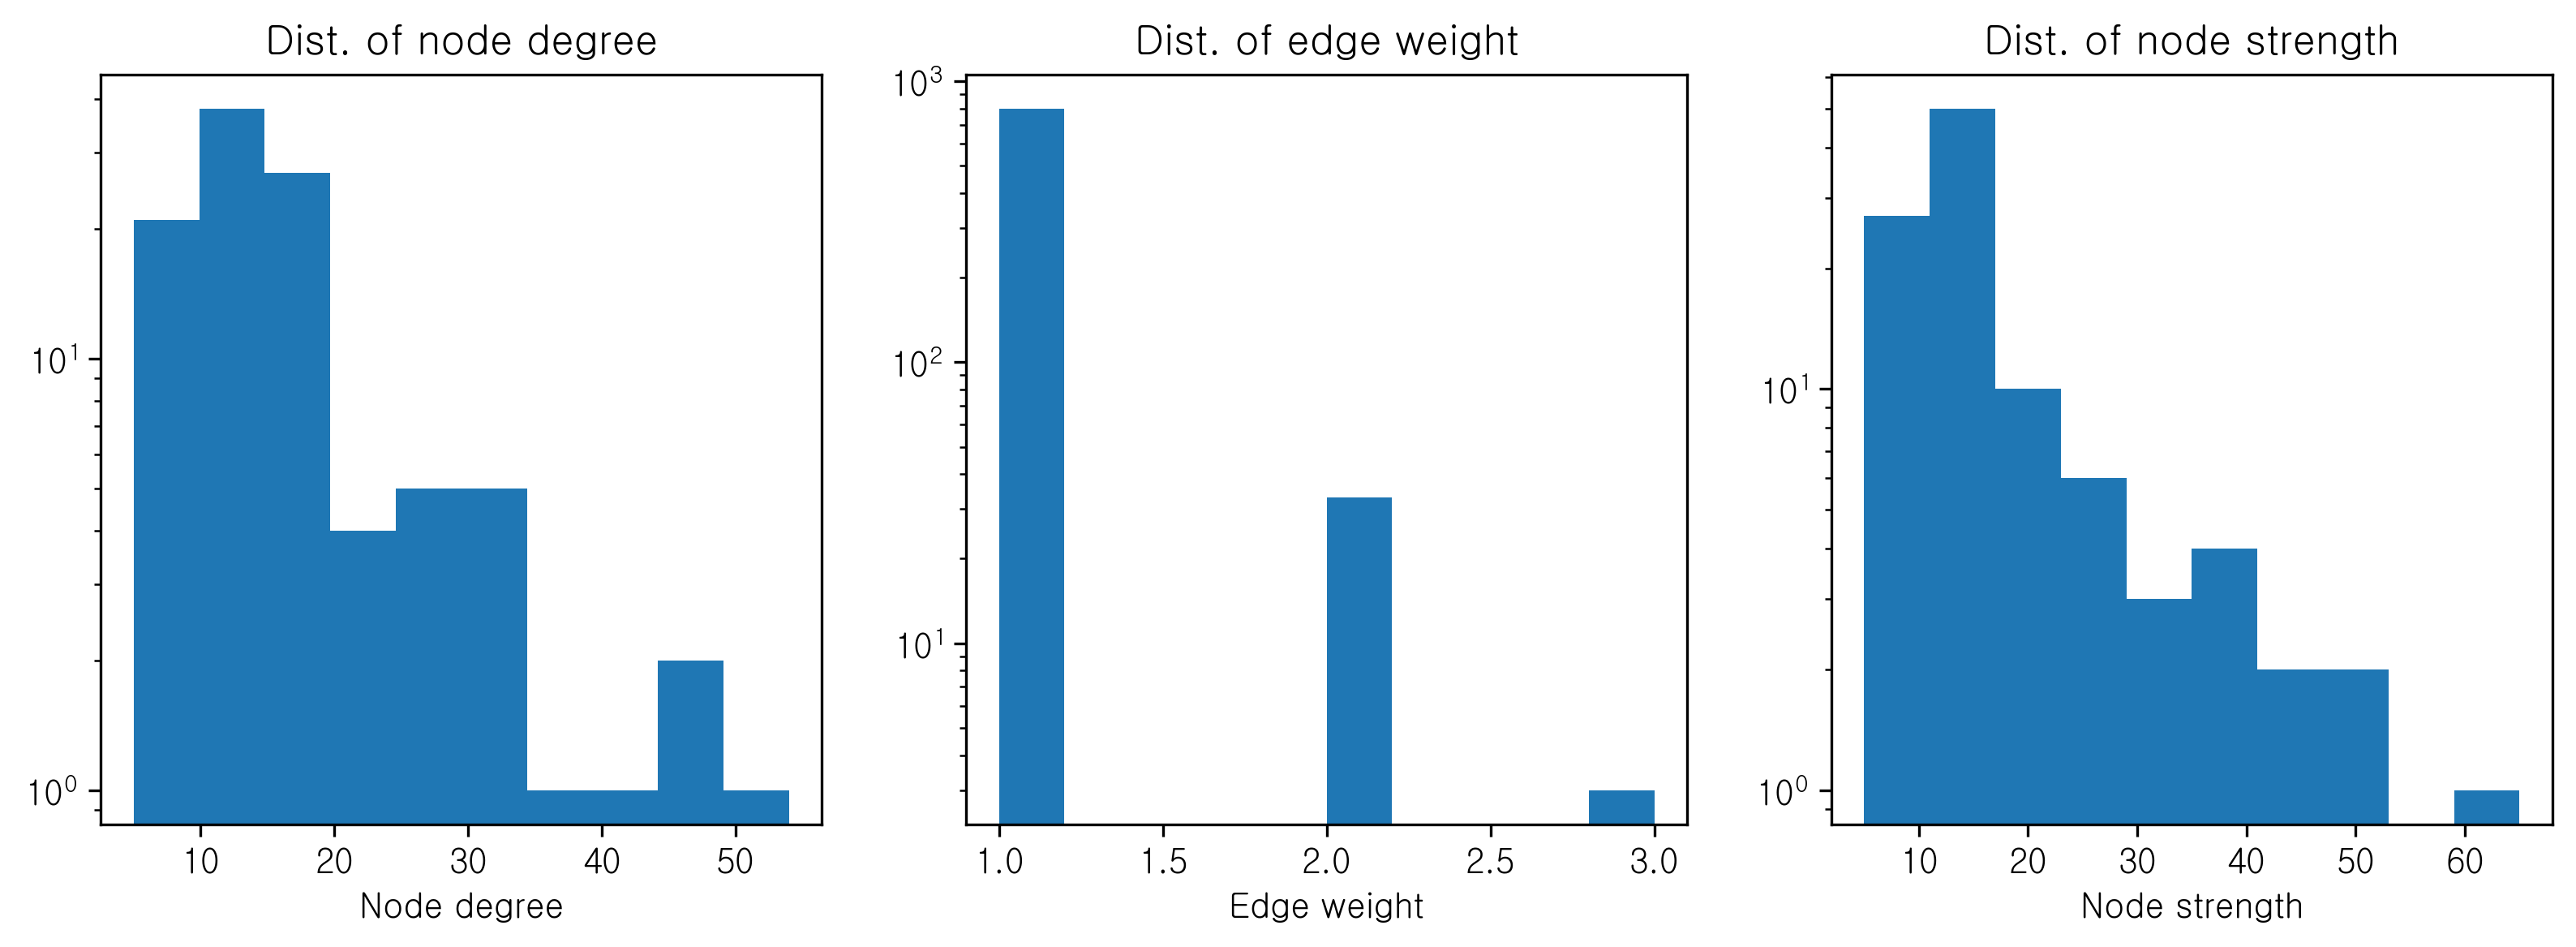

In [34]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [35]:
df = info(G)
df.head(20)

Node_ND  Node Degree        Edge  Edge Weight Node_NS  Node Strength  \
0       다양         54.0    (측정, 다양)            3      다양           65.0   
1       지구         46.0    (다양, 지구)            3      기술           52.0   
2       기술         45.0    (기술, 활용)            3      지구           52.0   
3     일상생활         41.0    (측정, 자연)            2    일상생활           43.0   
4       활용         37.0    (측정, 현대)            2      활용           42.0   
5       측정         34.0    (다양, 자연)            2      측정           38.0   
6       과정         33.0    (다양, 설명)            2      자연           37.0   
7       의미         32.0    (다양, 현대)            2      의미           35.0   
8       자연         31.0  (다양, 일상생활)            2      과정           35.0   
9       영향         31.0    (다양, 활용)            2      구성           33.0   
10      이해         29.0    (다양, 기술)            2      영향           31.0   
11      구성         28.0    (다양, 인식)            2      이해           29.0   
12      조사         26.0     (자연, 예)            2      인식           28.0   
13      분석         26.0    (자연, 설명)            2      설명           27.0   
14      인식         25.0    (자연, 현대)            2      현대           27.0   
15      설명         24.0    (자연, 기술)            2      조사           26.0   
16      현대         24.0     (예, 설명)            2      분석           26.0   
17      전환         23.0    (과학, 탐구)            2      전환           24.0   
18      물질         21.0    (과학, 의미)            2      물질           22.0   
19       예         19.0    (탐구, 의미)            2       예           21.0   

   Node_BC  Betweenness Centrality  
0       다양                0.178566  
1       적용                0.174896  
2       지구                0.170978  
3       기술                0.139082  
4     일상생활                0.135013  
5       과정                0.109882  
6       의미                0.106438  
7       활용                0.094342  
8       자연                0.090540  
9       설명                0.085448  
10      측정                0.083755  
11      구성                0.080416  
12      이해                0.077222  
13      영향                0.073442  
14      분석                0.072762  
15      조사                0.069208  
16      전환                0.059695  
17      현상                0.058557  
18       예                0.055008  
19      탐구                0.053681

## 물리학

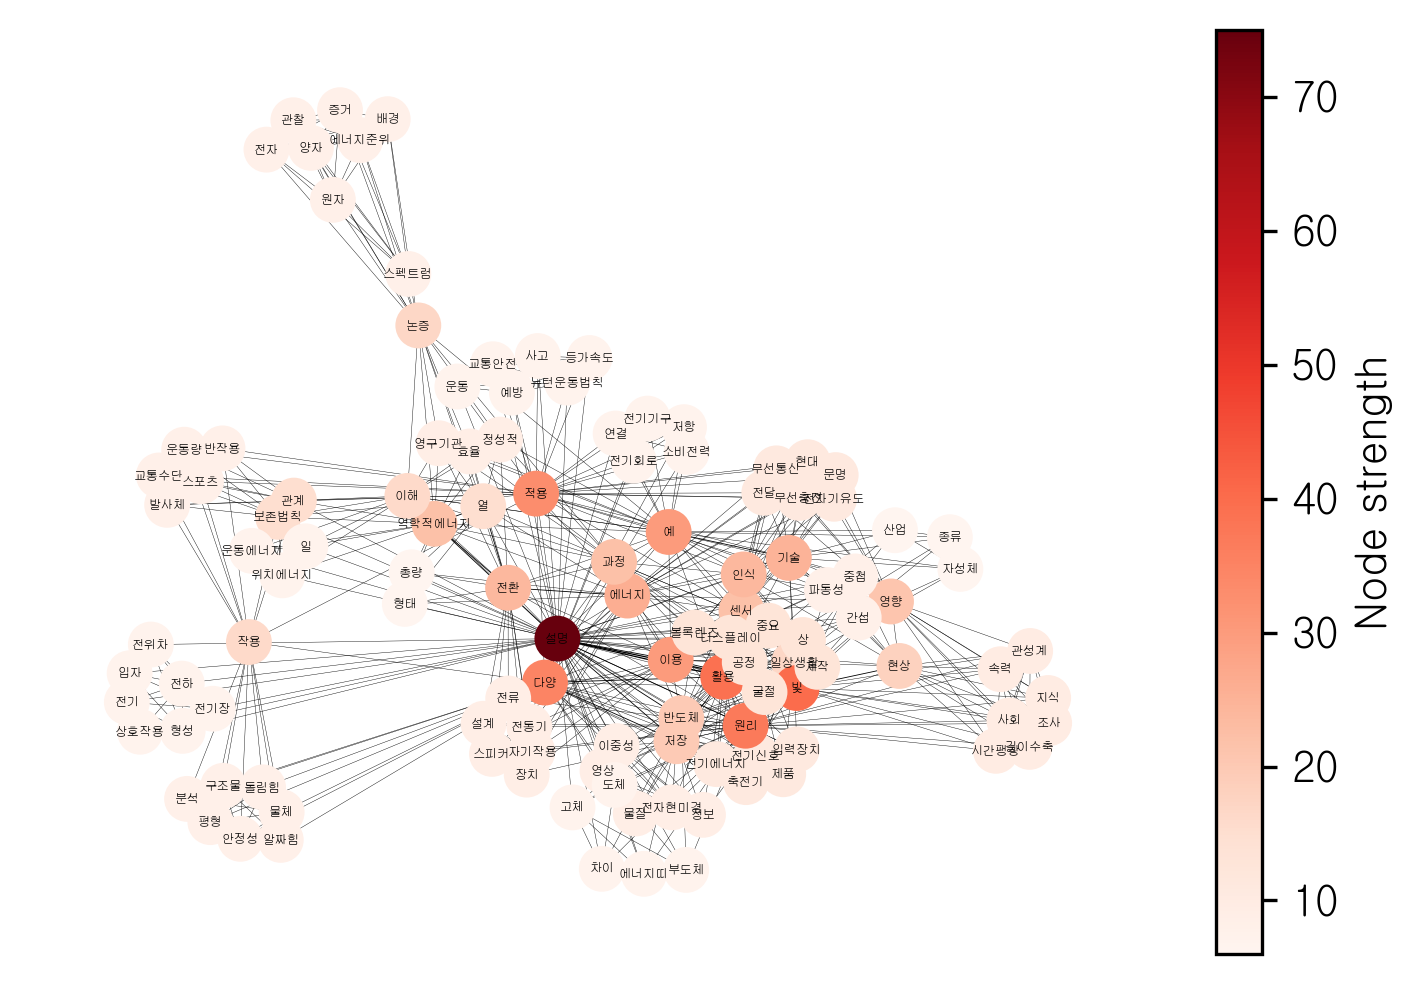

In [36]:
#(itr, seed, k, file_name)
subject_graph(220,51, 1.5, file_lst[3])

In [37]:
G = graph(file_lst[3])

Number of nodes: 119
Number of edges: 715
Degree avg: 12.02, Degree std: 8.27
EdgeWeight avg: 1.03, EdgeWeight std: 0.2
NodeWeight avg: 12.42, NodeWeight std: 9.34


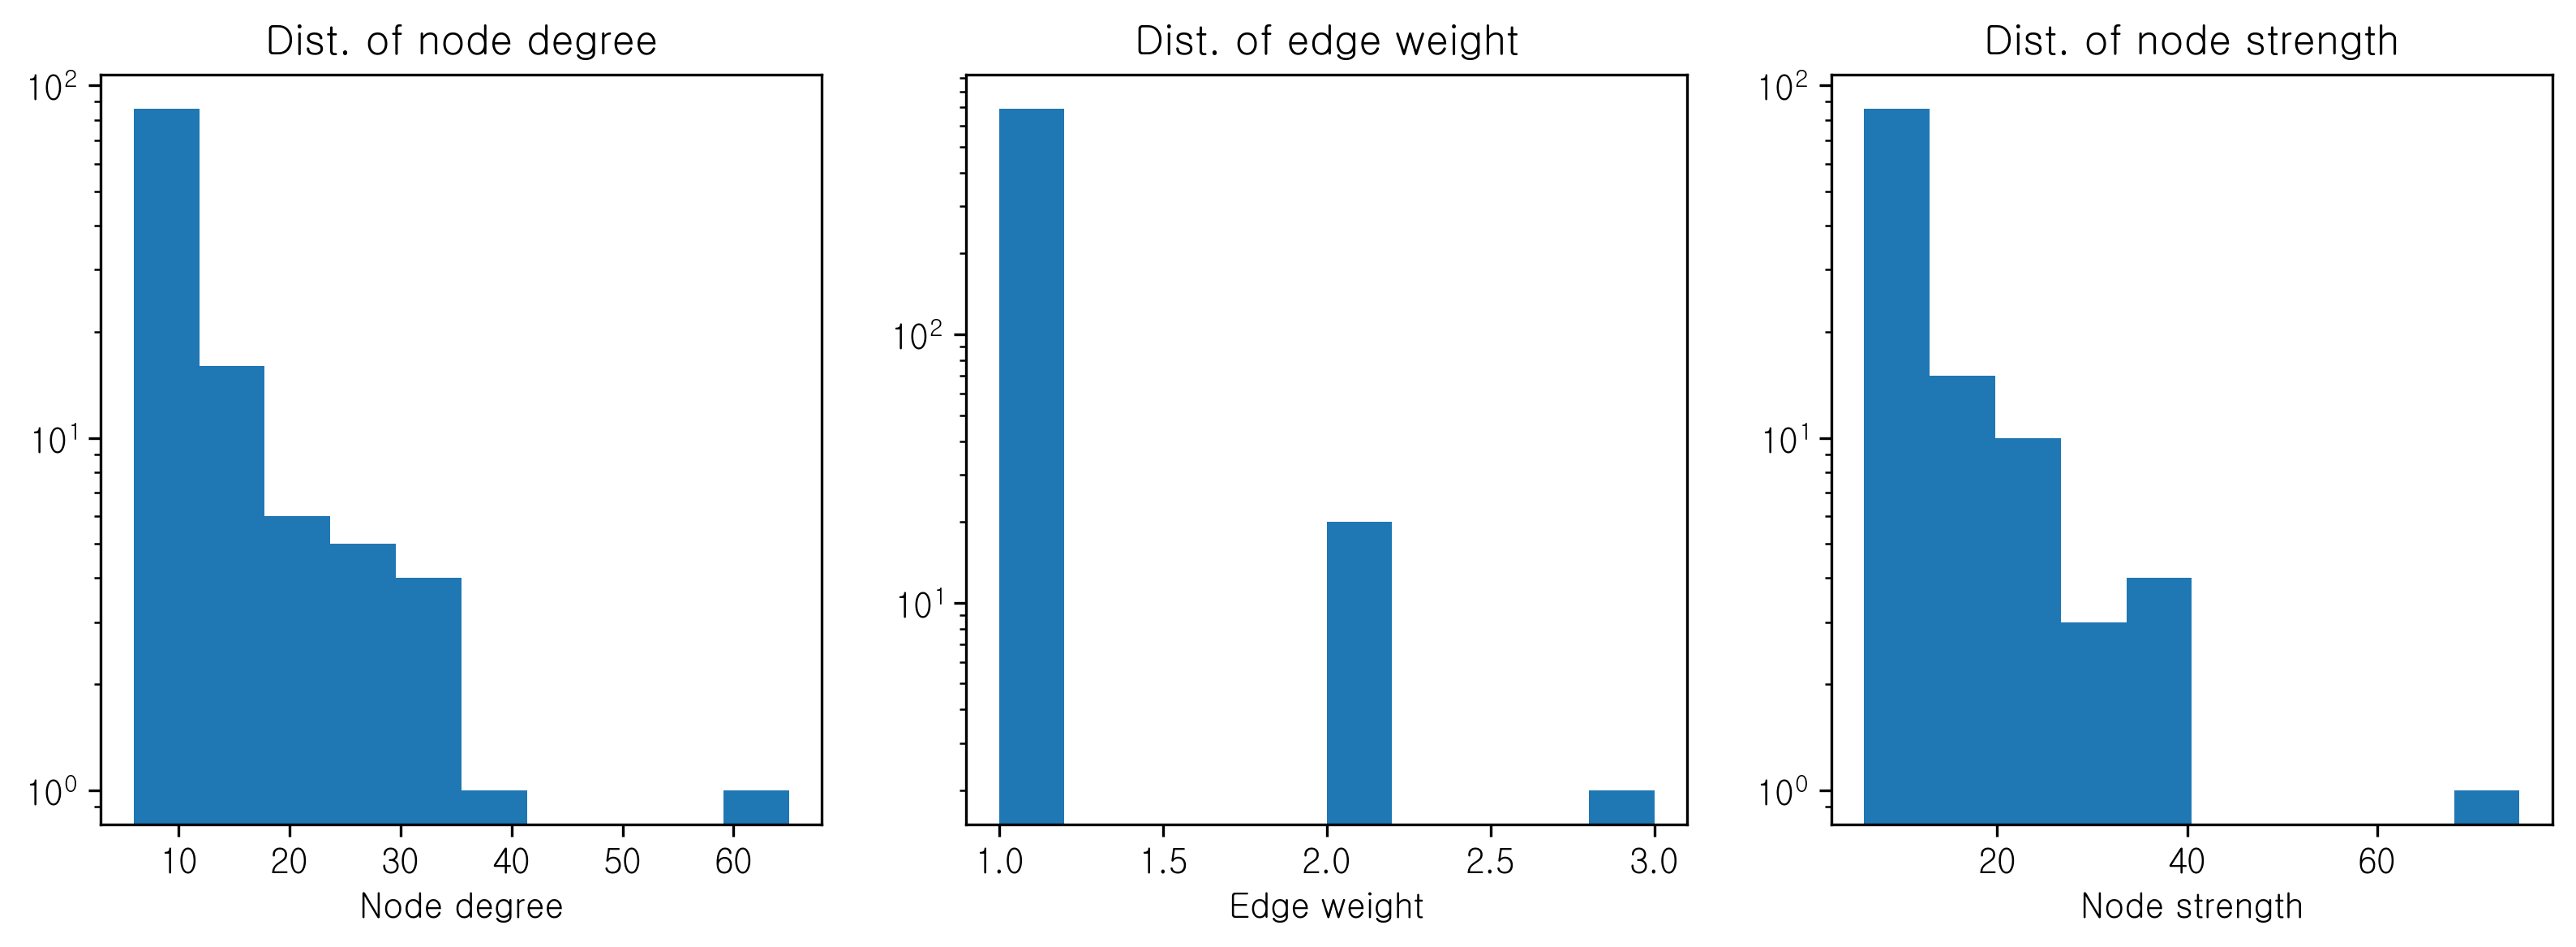

In [38]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [39]:
df = info(G)
df.head(20)

Node_ND  Node Degree          Edge  Edge Weight Node_NS  Node Strength  \
0       설명         65.0      (설명, 활용)            3      설명           75.0   
1       원리         36.0       (설명, 빛)            3       빛           40.0   
2        빛         35.0      (다양, 활용)            2      활용           39.0   
3       적용         33.0      (다양, 설명)            2      원리           37.0   
4       활용         33.0      (다양, 저장)            2      다양           35.0   
5       다양         32.0  (설명, 역학적에너지)            2      적용           33.0   
6        예         29.0      (설명, 원리)            2       예           30.0   
7       이용         28.0      (설명, 저장)            2      이용           30.0   
8      에너지         25.0      (설명, 이용)            2     에너지           26.0   
9       기술         24.0     (설명, 반도체)            2      기술           25.0   
10      인식         24.0    (관계, 보존법칙)            2      전환           24.0   
11      과정         22.0  (역학적에너지, 이해)            2      인식           24.0   
12      센서         22.0   (역학적에너지, 열)            2  역학적에너지           22.0   
13      전환         21.0  (역학적에너지, 전환)            2      과정           22.0   
14      영향         21.0       (열, 전환)            2      센서           22.0   
15     반도체         19.0     (에너지, 전환)            2      영향           21.0   
16  역학적에너지         18.0       (예, 기술)            2      저장           20.0   
17      논증         17.0    (활용, 일상생활)            2     반도체           20.0   
18      저장         17.0      (활용, 저장)            2      현상           18.0   
19      현상         17.0       (활용, 빛)            2      논증           17.0   

   Node_BC  Betweenness Centrality  
0       설명                0.355189  
1       적용                0.175339  
2       다양                0.175326  
3       논증                0.143430  
4       원리                0.141487  
5        예                0.139287  
6        빛                0.121124  
7       활용                0.107025  
8       전환                0.093537  
9      에너지                0.090565  
10  역학적에너지                0.087603  
11      이용                0.085981  
12      과정                0.083675  
13      작용                0.082364  
14      기술                0.071847  
15      이해                0.066307  
16      영향                0.062938  
17      인식                0.061847  
18      관계                0.059082  
19    보존법칙                0.059082

## 역학과 에너지

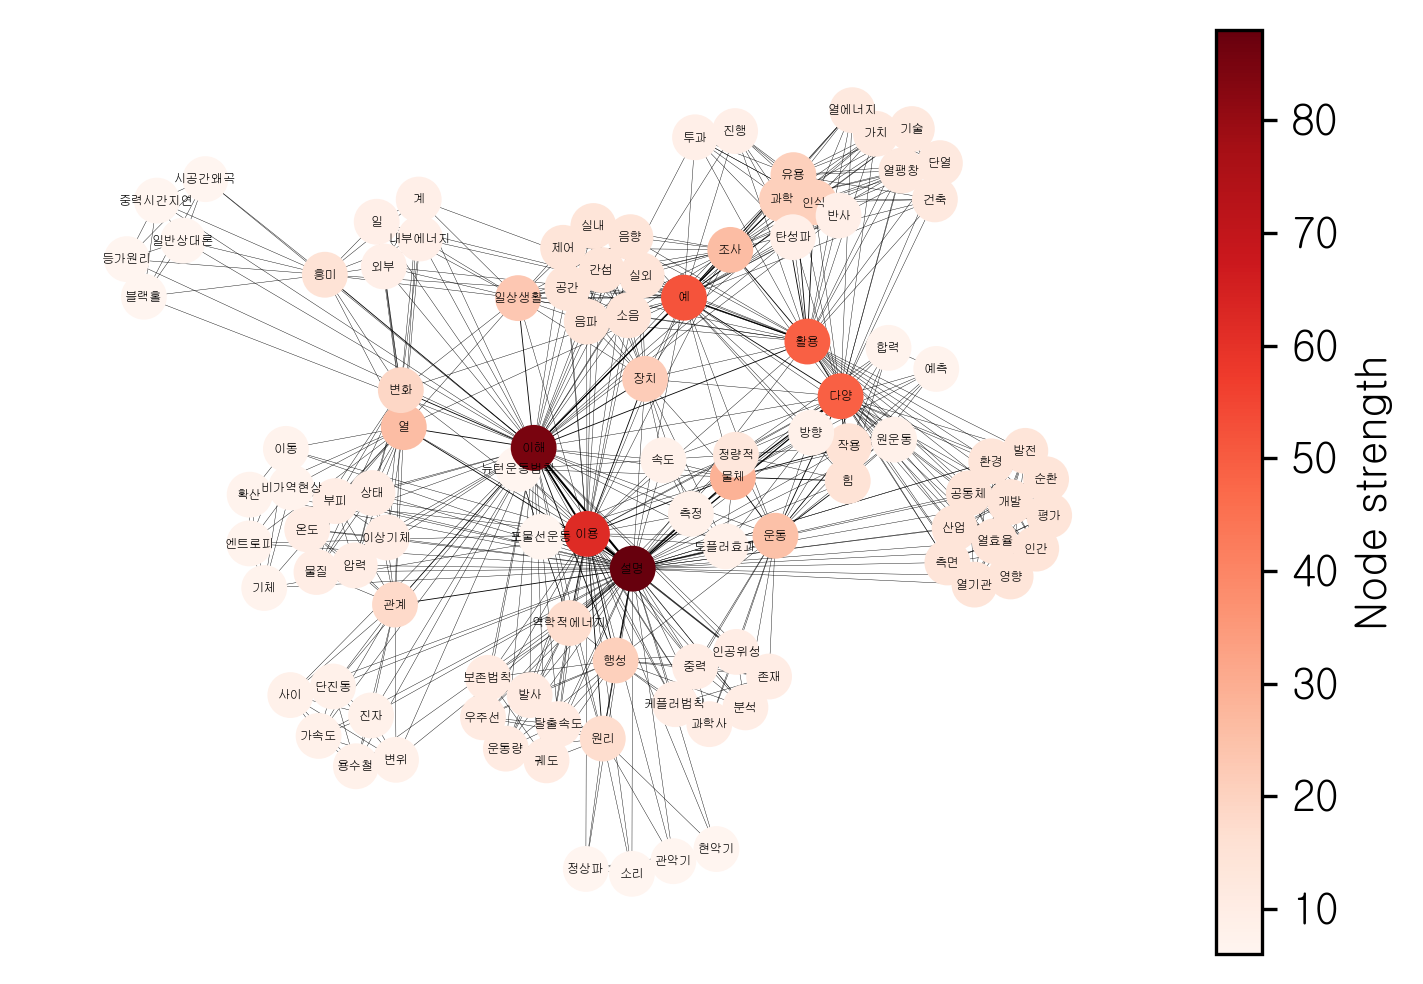

In [41]:
#(itr, seed, k, file_name)
subject_graph(150,8, 1.0, file_lst[4])

In [42]:
G = graph(file_lst[4])

Number of nodes: 105
Number of edges: 715
Degree avg: 13.62, Degree std: 10.54
EdgeWeight avg: 1.09, EdgeWeight std: 0.39
NodeWeight avg: 14.88, NodeWeight std: 13.66


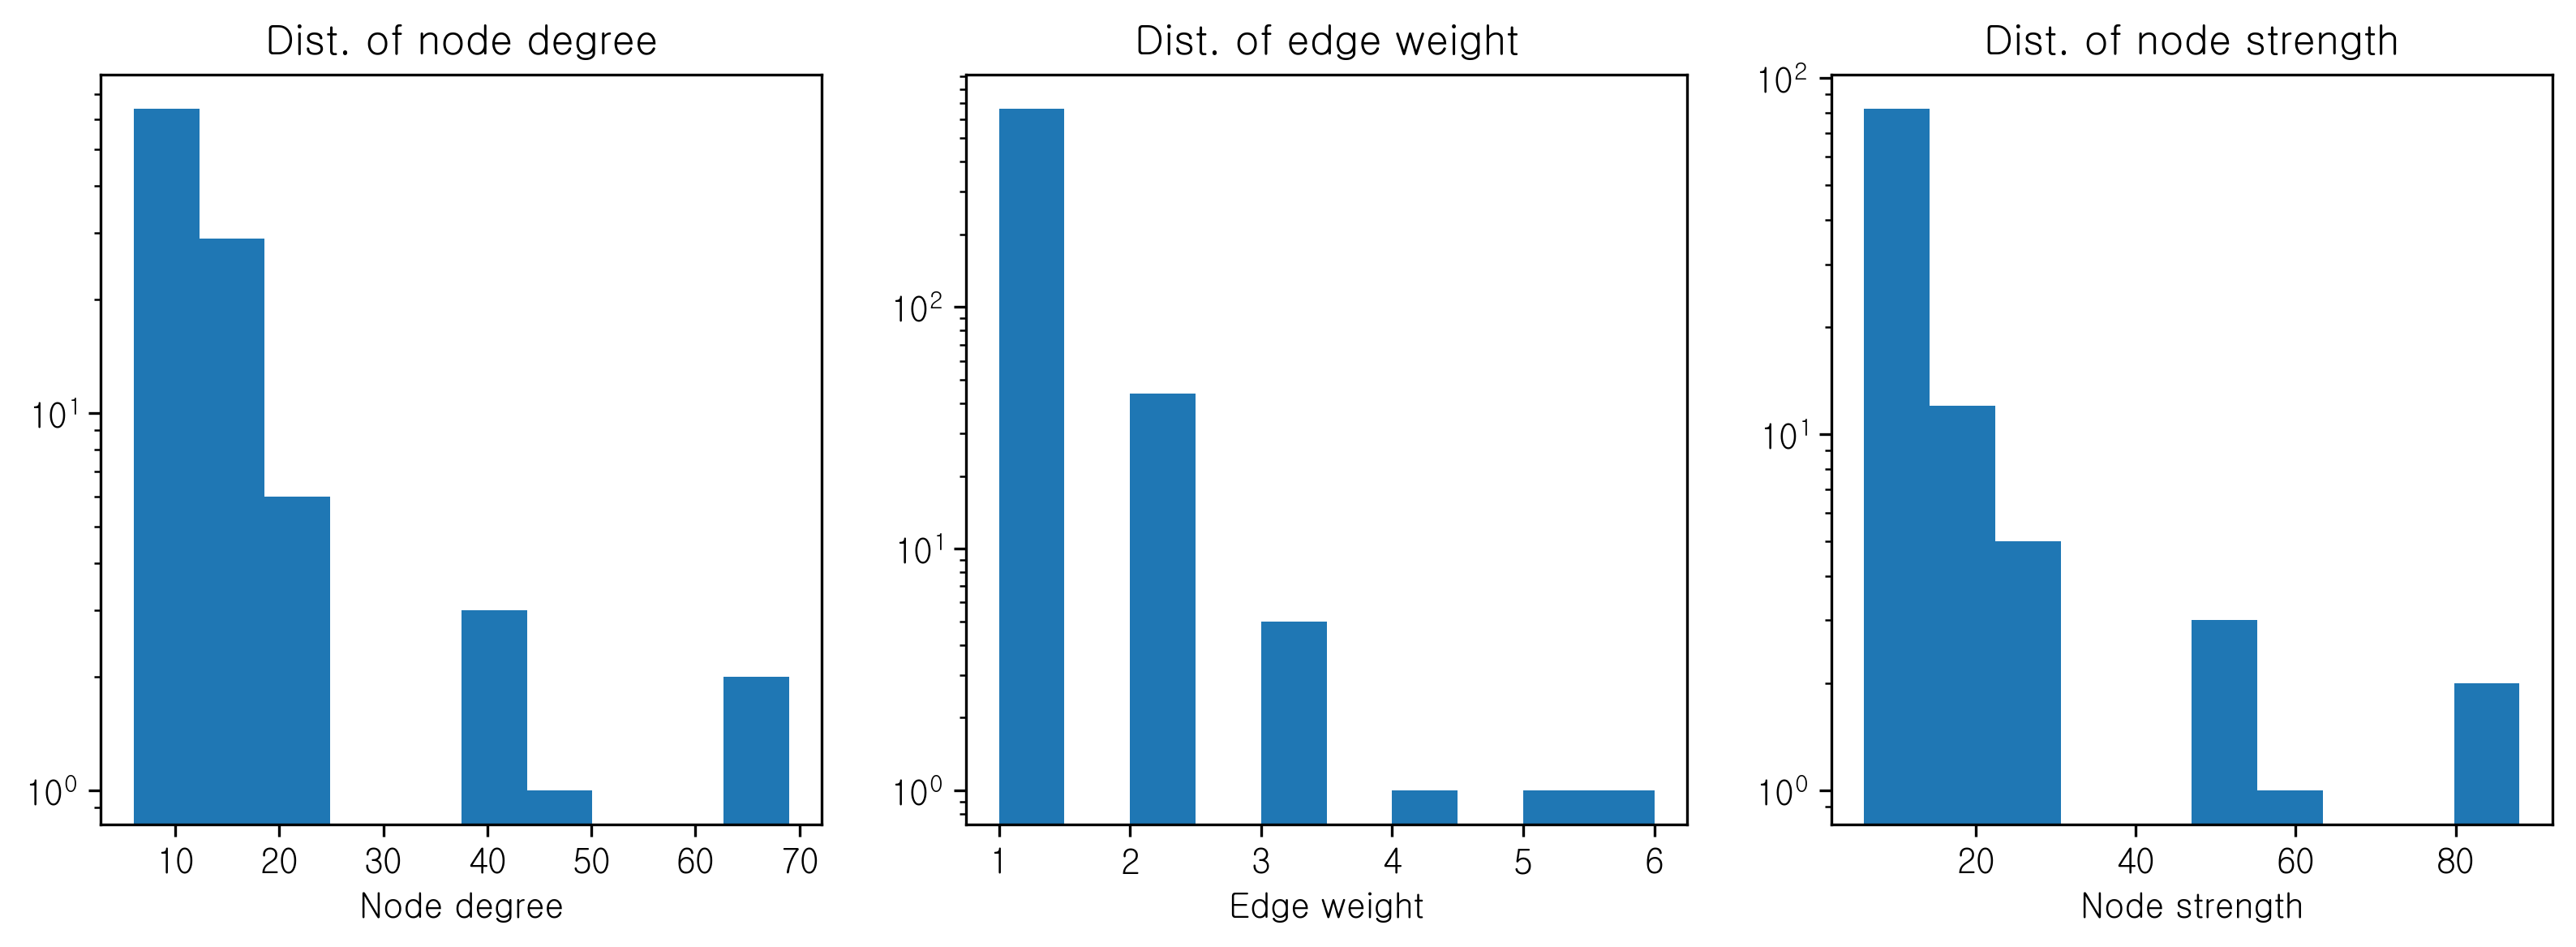

In [43]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [44]:
df = info(G)
df.head(20)

Node_ND  Node Degree       Edge  Edge Weight Node_NS  Node Strength  \
0       설명         69.0   (설명, 이용)            6      설명           88.0   
1       이해         68.0   (설명, 이해)            5      이해           85.0   
2       이용         49.0   (이용, 이해)            4      이용           62.0   
3        예         42.0   (다양, 물체)            3       예           52.0   
4       활용         41.0   (다양, 설명)            3      다양           49.0   
5       다양         40.0   (물체, 설명)            3      활용           49.0   
6       조사         24.0    (예, 활용)            3      물체           29.0   
7        열         23.0    (예, 이해)            3      조사           26.0   
8     일상생활         21.0   (작용, 다양)            2       열           26.0   
9       물체         20.0   (작용, 물체)            2      운동           25.0   
10      운동         20.0    (작용, 힘)            2    일상생활           23.0   
11      장치         20.0   (작용, 운동)            2      장치           22.0   
12      행성         18.0    (다양, 힘)            2      행성           21.0   
13      과학         17.0   (다양, 운동)            2      과학           21.0   
14      유용         17.0    (다양, 예)            2      유용           21.0   
15      인식         17.0   (다양, 활용)            2      인식           21.0   
16      변화         17.0    (물체, 힘)            2      변화           19.0   
17      관계         16.0   (물체, 운동)            2      관계           18.0   
18  역학적에너지         15.0  (물체, 정량적)            2  역학적에너지           17.0   
19      원리         15.0   (물체, 이용)            2      원리           17.0   

   Node_BC  Betweenness Centrality  
0       설명                0.319073  
1       이해                0.316466  
2       이용                0.194349  
3       다양                0.162439  
4        예                0.152214  
5       활용                0.148446  
6        열                0.088626  
7       물체                0.071094  
8       운동                0.066415  
9     일상생활                0.060420  
10      조사                0.059062  
11      흥미                0.058874  
12      관계                0.054893  
13      변화                0.052301  
14      장치                0.048957  
15      행성                0.048043  
16      원리                0.043255  
17  역학적에너지                0.039433  
18      과학                0.035857  
19      인식                0.035857

## 전자기와 양자

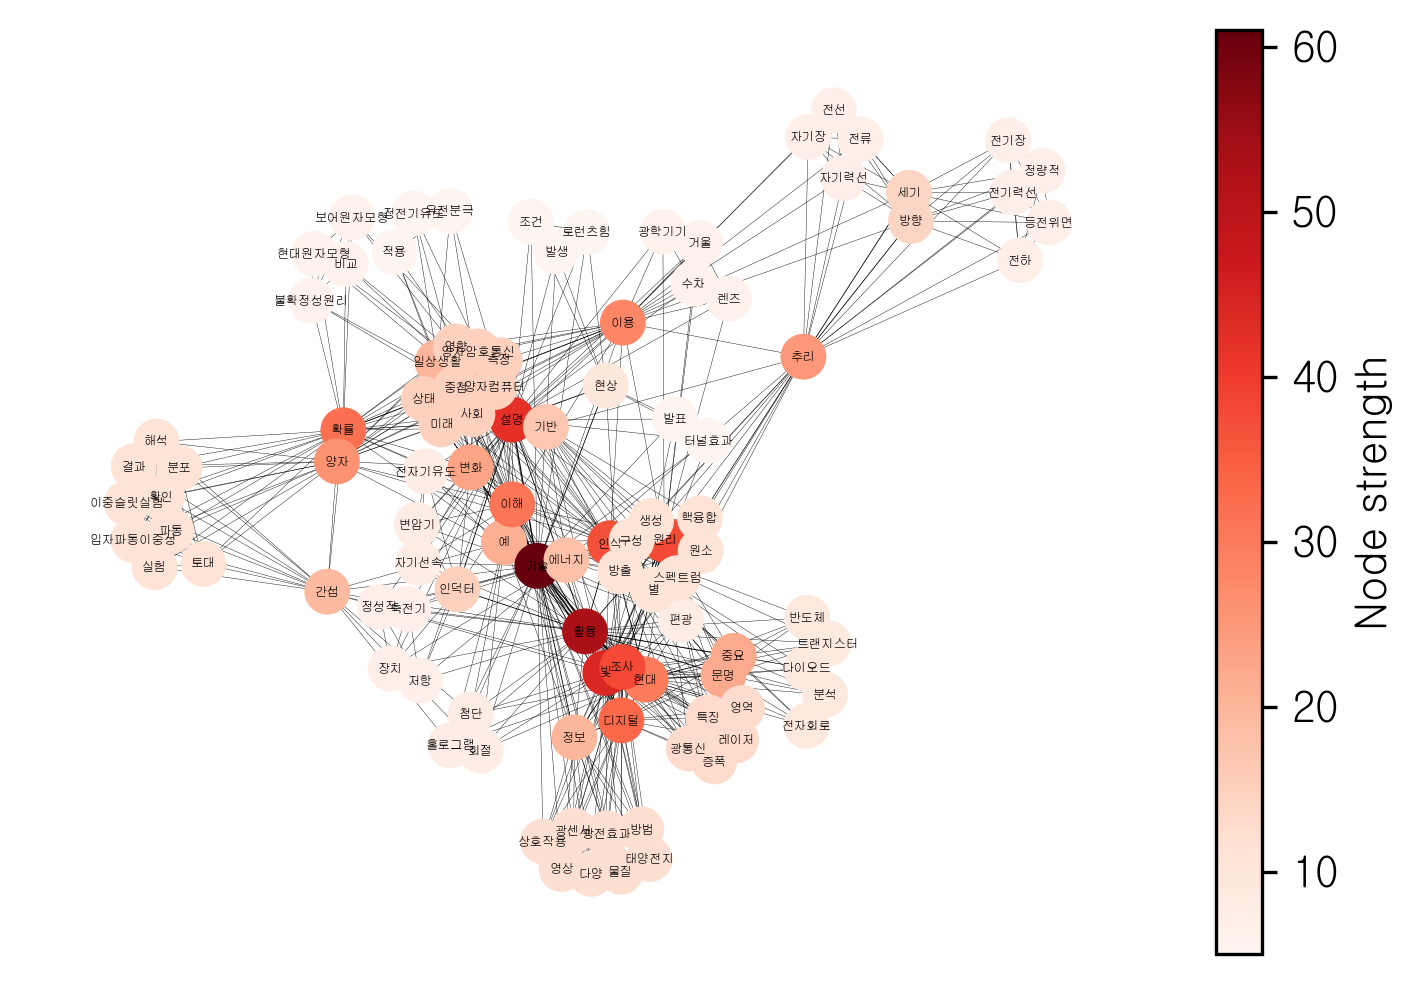

In [45]:
#(itr, seed, k, file_name)
subject_graph(150,8, 1.0, file_lst[5])

In [46]:
G = graph(file_lst[5])

Number of nodes: 105
Number of edges: 695
Degree avg: 13.24, Degree std: 8.41
EdgeWeight avg: 1.07, EdgeWeight std: 0.29
NodeWeight avg: 14.19, NodeWeight std: 10.48


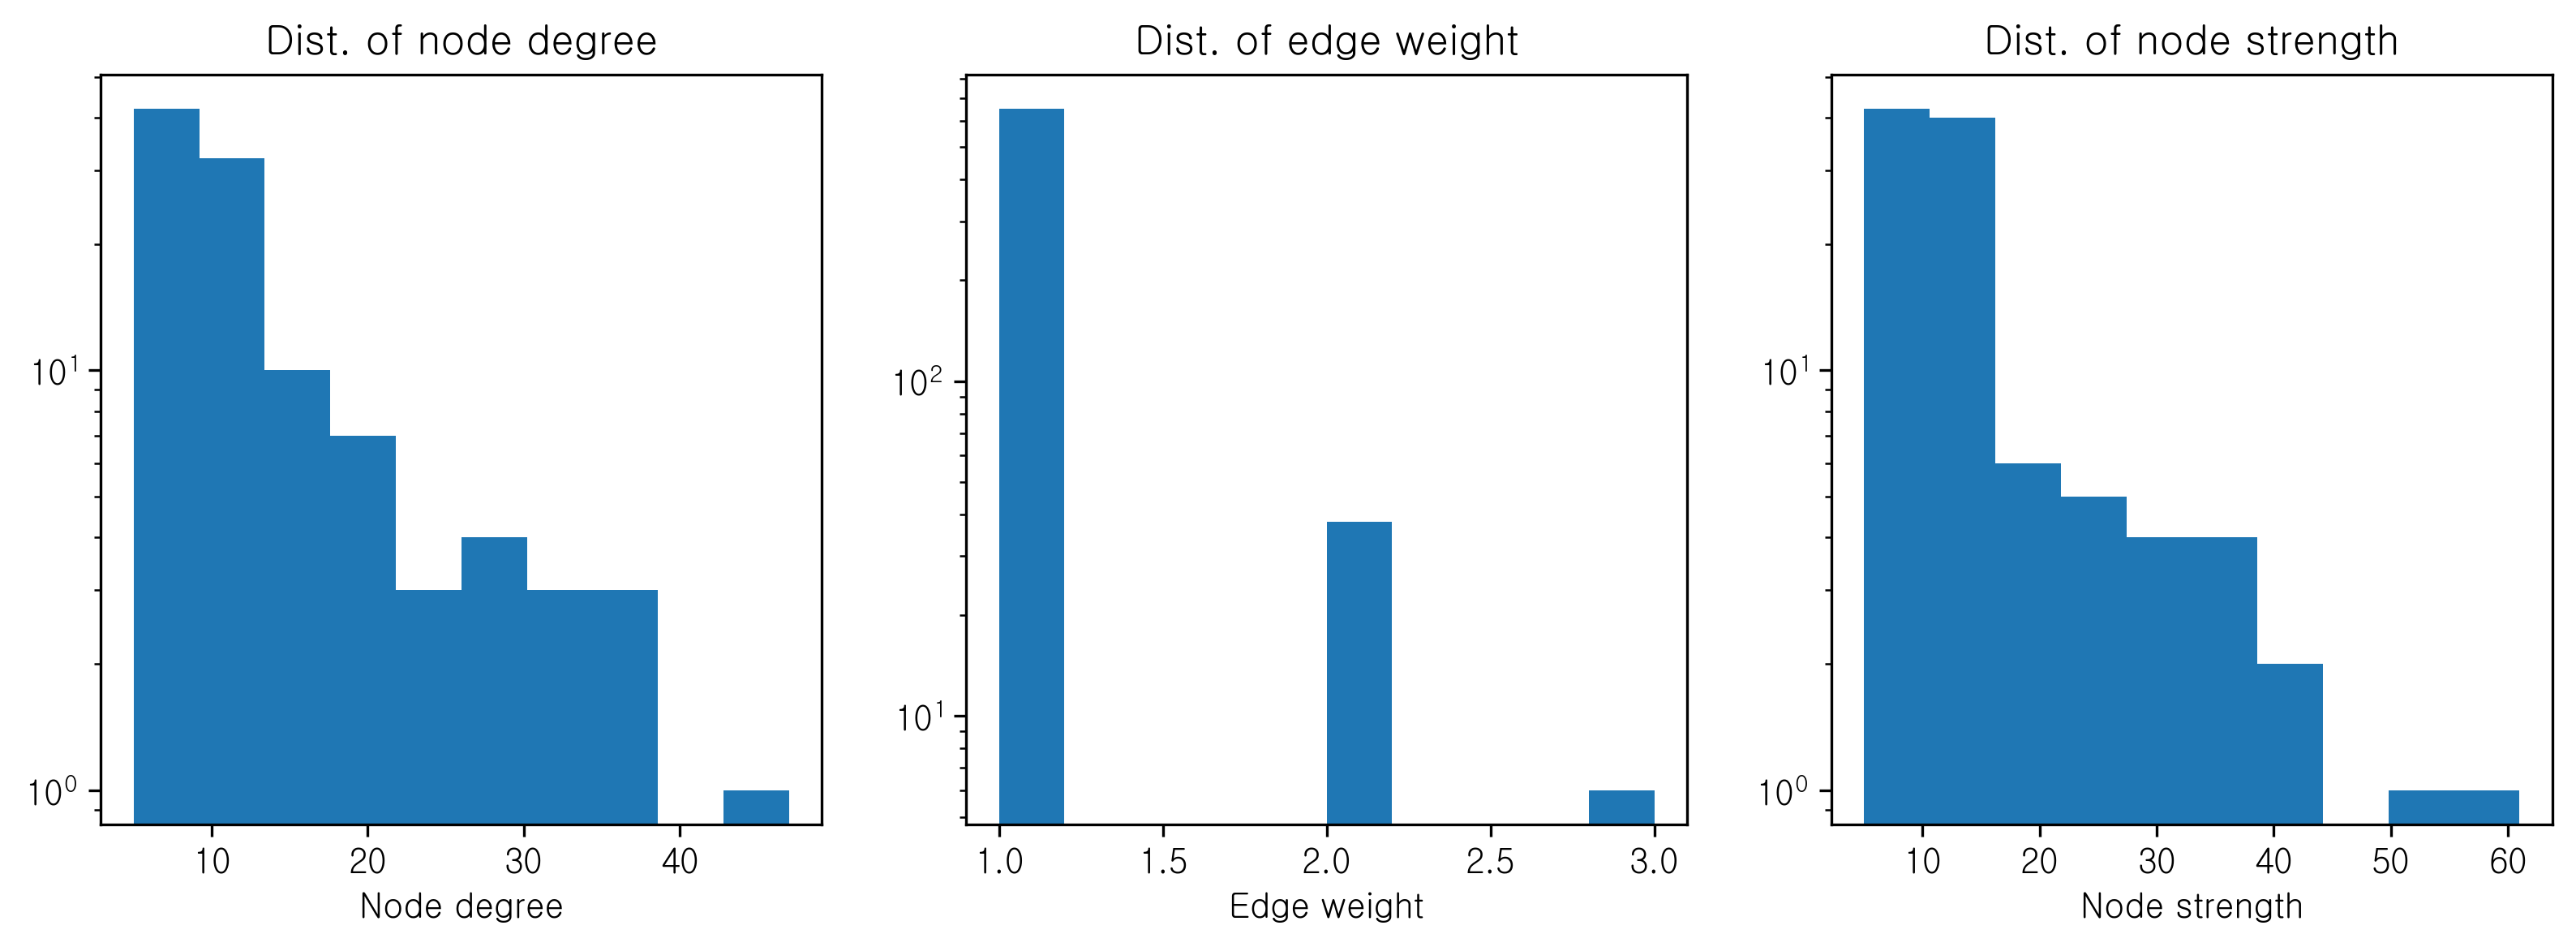

In [47]:
hist_edges, hist_edgeWeight, hist_nodeWeight = basic_info(G)
hist_plot(hist_edges, hist_edgeWeight, hist_nodeWeight)

In [48]:
df = info(G)
df.head(20)

Node_ND  Node Degree       Edge  Edge Weight Node_NS  Node Strength  \
0       기술         47.0   (설명, 기술)            3      기술           61.0   
1       활용         38.0   (기술, 활용)            3      활용           53.0   
2        빛         38.0   (기술, 이해)            3       빛           44.0   
3       설명         37.0   (기술, 조사)            3      설명           42.0   
4       원리         34.0   (활용, 현대)            3      원리           38.0   
5       인식         33.0  (조사, 디지털)            3      조사           38.0   
6       확률         31.0   (방향, 세기)            2      인식           37.0   
7       조사         30.0   (방향, 추리)            2     디지털           33.0   
8       이용         28.0   (세기, 추리)            2      확률           32.0   
9       이해         27.0    (예, 활용)            2      이해           31.0   
10     디지털         26.0    (예, 기술)            2      현대           30.0   
11      양자         25.0   (설명, 현상)            2      이용           28.0   
12      현대         24.0  (설명, 인덕터)            2      양자           26.0   
13      추리         23.0   (설명, 활용)            2      추리           25.0   
14      변화         21.0   (현상, 기술)            2      변화           23.0   
15    일상생활         20.0   (기술, 변화)            2      중요           22.0   
16       예         19.0    (기술, 빛)            2      문명           22.0   
17      간섭         19.0   (기술, 정보)            2       예           21.0   
18     에너지         18.0  (기술, 디지털)            2    일상생활           20.0   
19      중요         18.0  (인덕터, 활용)            2      정보           20.0   

   Node_BC  Betweenness Centrality  
0       기술                0.202466  
1       설명                0.190485  
2       이용                0.164825  
3        빛                0.157158  
4       활용                0.153970  
5       추리                0.149024  
6       원리                0.146557  
7       확률                0.133925  
8       인식                0.111917  
9       조사                0.095564  
10      양자                0.089157  
11      이해                0.082726  
12      간섭                0.079626  
13      기반                0.075782  
14     에너지                0.072094  
15     디지털                0.072008  
16      현대                0.068813  
17       예                0.064951  
18    일상생활                0.056527  
19      변화                0.056186